In [ ]:
#pip install xlrd==1.2.0

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import chi2_contingency
from statistics import mode
%matplotlib inline 
sns.set(color_codes=True)
from sklearn.model_selection import StratifiedKFold, KFold
plt.style.use("classic")
from  sklearn.ensemble  import  RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn  import datasets, metrics

In [2]:
bd=pd.read_excel('bdm.xlsx')
del bd['PROG']
bd.shape

(1229, 60)

In [3]:
bd.columns

Index(['PRODUM', 'facultad', 'SEM', 'edadm', 'EDAD', 'SEXO', 'ESTADO CIVIL',
       'ESE', 'NP1 CUELLO', 'NP1 HOMBRO', 'NP1 DORSO', 'NP1 CODO',
       'NP1 MUÑECA', 'NP2', 'NP4 CUELLO', 'NP4 HOMBRO', 'NP4 DORSO',
       'NP4 CODO', 'NP4 MUÑECA', 'NP5 CUELLO', 'NP5 HOMBRO', 'NP5 DORSO',
       'NP5 CODO', 'NP5 MUÑECA', 'NP6 CUELLO', 'NP6 HOMBRO', 'NP6 DORSO',
       'NP6 CODO', 'NP6 MUÑECA', 'NP7 CUELLO', 'NP7 HOMBRO', 'NP7 DORSO',
       'NP7 CODO', 'NP7 MUÑECA', 'NP8 CUELLO', 'NP8 HOMBRO', 'NP8 DORSO',
       'NP8 CODO', 'NP8 MUÑECA', 'NP10 CUELLO', 'NP10 HOMBRO', 'NP10 DORSO',
       'NP10 CODO', 'NP10 MUÑECA', 'Dependencia', 'nivel dependencia', 'FP7',
       'FP10', 'FP11', 'FP12', 'FP13', 'FP14', 'FP15', 'FP16', 'FP17', 'FP20',
       'FP25 A', 'FP25 C', 'FP25 F', 'FP25 H'],
      dtype='object')

In [4]:
#identificar aquellas posiciones donde hay valores nulos
count = 0
for col in bd.columns:
    if bd[col].dtype=='float64':
        x=np.isnan(bd[col])
        count = count + np.sum(x)
        print(col,np.where(x==True)[0])
print(count)    

PRODUM [1228]
SEM [1228]
edadm [1228]
EDAD [ 324  338  555  622 1228]
SEXO [ 324  738 1228]
ESTADO CIVIL [1228]
ESE [ 311  320 1228]
NP1 CUELLO [1228]
NP1 HOMBRO [1228]
NP1 DORSO [1228]
NP1 CODO [1228]
NP1 MUÑECA [1228]
NP2 [1228]
NP4 CUELLO [1228]
NP4 HOMBRO [1228]
NP4 DORSO [1228]
NP4 CODO [1228]
NP4 MUÑECA [1228]
NP5 CUELLO [1228]
NP5 HOMBRO [1228]
NP5 DORSO [1228]
NP5 CODO [1228]
NP5 MUÑECA [1228]
NP6 CUELLO [1228]
NP6 HOMBRO [1228]
NP6 DORSO [1228]
NP6 CODO [1228]
NP6 MUÑECA [1228]
NP7 CUELLO [1228]
NP7 HOMBRO [1228]
NP7 DORSO [1228]
NP7 CODO [1228]
NP7 MUÑECA [1228]
NP8 CUELLO [1228]
NP8 HOMBRO [1228]
NP8 DORSO [1228]
NP8 CODO [1228]
NP8 MUÑECA [1228]
NP10 CUELLO [1228]
NP10 HOMBRO [1228]
NP10 DORSO [1228]
NP10 CODO [1228]
NP10 MUÑECA [1228]
FP7 [ 554  577  907 1008 1035 1037 1112 1118 1121 1133 1182 1213 1228]
FP10 [1228]
FP11 [ 345  413  452 1228]
FP12 [ 345  413  452  478 1228]
FP13 [1228]
FP14 [  37  196  774  777  848  856 1228]
FP15 [ 317  349  413 1228]
FP16 [ 306  387  41

In [190]:
bd=bd.replace({"SALUD":1,"CIENCIAS ECONOMICAS":2,"INGENIERIAS":3,"DERECHO":4})
bdp=bd[['PRODUM','facultad',"edadm",'EDAD','ESTADO CIVIL','ESE','NP1 CUELLO', 'NP1 HOMBRO', 'NP1 DORSO', 'NP1 CODO', 'NP1 MUÑECA',
       'NP2', 'NP4 CUELLO', 'NP4 HOMBRO', 'NP4 DORSO', 'NP4 CODO','NP4 MUÑECA','NP6 MUÑECA','FP7', 'FP10', 'FP11', 'FP12',
       'FP14', 'FP15', 'FP16', 'FP17', 'FP20', 'FP25 C','FP25 F', 'FP25 H','Dependencia']]

count = 0
for col in bdp.columns:
    if bdp[col].dtype=='float64':
        x=np.isnan(bdp[col])
        count = count + np.sum(x)
        print(col,np.where(x==True)[0])
print(count,bdp.shape)  


PRODUM [1228]
facultad [1228]
edadm [1228]
EDAD [ 324  338  555  622 1228]
ESTADO CIVIL [1228]
ESE [ 311  320 1228]
NP1 CUELLO [1228]
NP1 HOMBRO [1228]
NP1 DORSO [1228]
NP1 CODO [1228]
NP1 MUÑECA [1228]
NP2 [1228]
NP4 CUELLO [1228]
NP4 HOMBRO [1228]
NP4 DORSO [1228]
NP4 CODO [1228]
NP4 MUÑECA [1228]
NP6 MUÑECA [1228]
FP7 [ 554  577  907 1008 1035 1037 1112 1118 1121 1133 1182 1213 1228]
FP10 [1228]
FP11 [ 345  413  452 1228]
FP12 [ 345  413  452  478 1228]
FP14 [  37  196  774  777  848  856 1228]
FP15 [ 317  349  413 1228]
FP16 [ 306  387  413  547  548  549  551  552  553  554  557  558  560  561
  562  563  564  565  566  567  569  570  574  575  577  578  581  583
  584  587  588  589  590  591  592  593  768  889 1228]
FP17 [ 304  322  323  325  339  548  557  565  566  577  579  581  585  587
  588  590  592  593  733 1228]
FP20 [ 314  317  350  352  414  636 1228]
FP25 C [1228]
FP25 F [1228]
FP25 H [1228]
127 (1229, 31)


In [191]:
bdp=bdp.dropna()
print(bdp.isnull().sum(), bdp.shape)


PRODUM          0
facultad        0
edadm           0
EDAD            0
ESTADO CIVIL    0
ESE             0
NP1 CUELLO      0
NP1 HOMBRO      0
NP1 DORSO       0
NP1 CODO        0
NP1 MUÑECA      0
NP2             0
NP4 CUELLO      0
NP4 HOMBRO      0
NP4 DORSO       0
NP4 CODO        0
NP4 MUÑECA      0
NP6 MUÑECA      0
FP7             0
FP10            0
FP11            0
FP12            0
FP14            0
FP15            0
FP16            0
FP17            0
FP20            0
FP25 C          0
FP25 F          0
FP25 H          0
Dependencia     0
dtype: int64 (1150, 31)


In [198]:
bdp_E=bd[['PRODUM','facultad',"edadm",'ESTADO CIVIL','ESE','NP1 CUELLO', 'NP1 HOMBRO', 'NP1 DORSO', 'NP1 CODO', 'NP1 MUÑECA',
       'NP2', 'NP4 CUELLO', 'NP4 HOMBRO', 'NP4 DORSO', 'NP4 CODO','NP4 MUÑECA','NP6 MUÑECA','FP7', 'FP10', 'FP11', 'FP12',
       'FP14', 'FP15', 'FP16', 'FP17', 'FP20', 'FP25 C','FP25 F', 'FP25 H','Dependencia']]


count = 0
for col in bdp_E.columns:
    if bdp_E[col].dtype=='float64':
        x=np.isnan(bdp_E[col])
        count = count + np.sum(x)
        print(col,np.where(x==True)[0])
print(count,bdp_E.shape)  

bdp_E=bdp_E.dropna()
print(bdp_E.shape)

PRODUM [1228]
facultad [1228]
edadm [1228]
ESTADO CIVIL [1228]
ESE [ 311  320 1228]
NP1 CUELLO [1228]
NP1 HOMBRO [1228]
NP1 DORSO [1228]
NP1 CODO [1228]
NP1 MUÑECA [1228]
NP2 [1228]
NP4 CUELLO [1228]
NP4 HOMBRO [1228]
NP4 DORSO [1228]
NP4 CODO [1228]
NP4 MUÑECA [1228]
NP6 MUÑECA [1228]
FP7 [ 554  577  907 1008 1035 1037 1112 1118 1121 1133 1182 1213 1228]
FP10 [1228]
FP11 [ 345  413  452 1228]
FP12 [ 345  413  452  478 1228]
FP14 [  37  196  774  777  848  856 1228]
FP15 [ 317  349  413 1228]
FP16 [ 306  387  413  547  548  549  551  552  553  554  557  558  560  561
  562  563  564  565  566  567  569  570  574  575  577  578  581  583
  584  587  588  589  590  591  592  593  768  889 1228]
FP17 [ 304  322  323  325  339  548  557  565  566  577  579  581  585  587
  588  590  592  593  733 1228]
FP20 [ 314  317  350  352  414  636 1228]
FP25 C [1228]
FP25 F [1228]
FP25 H [1228]
122 (1229, 30)
(1154, 30)


In [102]:
bdp.shape

(1149, 31)

In [199]:
bdp1=bd[['PRODUM','facultad','EDAD','ESTADO CIVIL','ESE','NP1 CUELLO', 'NP1 HOMBRO', 'NP1 DORSO', 'NP1 CODO', 'NP1 MUÑECA',
       'NP2', 'NP4 CUELLO', 'NP4 HOMBRO', 'NP4 DORSO', 'NP4 CODO','NP4 MUÑECA','NP6 MUÑECA', 'FP7', 'FP10', 'FP11', 'FP12',
       'FP14', 'FP15', 'FP16', 'FP17', 'FP20', 'FP25 C','FP25 F', 'FP25 H','Dependencia']]



count = 0
for col in bdp1.columns:
    if bdp1[col].dtype=='float64':
        x=np.isnan(bdp1[col])
        count = count + np.sum(x)
        print(col,np.where(x==True)[0])
print(count,bdp1.shape)  

bdp1=bdp1.dropna()
print(bdp1.shape)


PRODUM [1228]
facultad [1228]
EDAD [ 324  338  555  622 1228]
ESTADO CIVIL [1228]
ESE [ 311  320 1228]
NP1 CUELLO [1228]
NP1 HOMBRO [1228]
NP1 DORSO [1228]
NP1 CODO [1228]
NP1 MUÑECA [1228]
NP2 [1228]
NP4 CUELLO [1228]
NP4 HOMBRO [1228]
NP4 DORSO [1228]
NP4 CODO [1228]
NP4 MUÑECA [1228]
NP6 MUÑECA [1228]
FP7 [ 554  577  907 1008 1035 1037 1112 1118 1121 1133 1182 1213 1228]
FP10 [1228]
FP11 [ 345  413  452 1228]
FP12 [ 345  413  452  478 1228]
FP14 [  37  196  774  777  848  856 1228]
FP15 [ 317  349  413 1228]
FP16 [ 306  387  413  547  548  549  551  552  553  554  557  558  560  561
  562  563  564  565  566  567  569  570  574  575  577  578  581  583
  584  587  588  589  590  591  592  593  768  889 1228]
FP17 [ 304  322  323  325  339  548  557  565  566  577  579  581  585  587
  588  590  592  593  733 1228]
FP20 [ 314  317  350  352  414  636 1228]
FP25 C [1228]
FP25 F [1228]
FP25 H [1228]
126 (1229, 30)
(1150, 30)


In [283]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


def get_metrics(y_truth,y_predicted,dict_res,scores=None):
    cm = confusion_matrix(y_truth,y_predicted)
    total=sum(sum(cm))
    #####from confusion matrix calculate metrics
    accuracy=(cm[0,0]+cm[1,1])/total
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    precision   = cm[1,1]/(cm[1,1]+cm[0,1])
    F1 = 2*sensitivity*precision/(sensitivity+precision)
    
    dict_res['accuracy'].append(accuracy)
    dict_res['specificity'].append(specificity)
    dict_res['sensitivity'].append(sensitivity)
    dict_res['precision'].append(precision)
    dict_res['F1'].append(F1)
    #se usa la funcion enviando las etiquetas correctas y la probabilidad de la etiqueta 1
    if len(scores)>1:
        fpr, tpr, _ = metrics.roc_curve(y_truth, scores)
        roc_auc = metrics.auc (fpr, tpr)
        dict_res['roc'].append([fpr, tpr,roc_auc])
        
    return dict_res

results

Classifier: Decision Tree 
accuracy = 69.42028985507245 +- 1.3672436423270442
sensitivity = 77.99180327868852 +- 2.1378362878270427
specificity = 48.71287128712871 +- 5.0251792239404045
precision = 78.64539172354286 +- 1.4650319941073804
F1 = 78.28826205855019 +- 1.0589965732154407
roc = 0.6335233728290862 +- 0.020831023366787476

Classifier: Logistic Regression 
accuracy = 75.47826086956522 +- 1.3730689022987834
sensitivity = 90.9016393442623 +- 2.3313873202176882
specificity = 38.21782178217822 +- 4.320282025598302
precision = 78.06379086935937 +- 1.0276592694536437
F1 = 83.97405998153393 +- 1.0089709706700911
roc = 0.7104244440837527 +- 0.030858418204432712

Classifier: Random Forest 
accuracy = 75.04347826086956 +- 1.933357234278528
sensitivity = 90.16393442622952 +- 2.7492639067620352
specificity = 38.51485148514852 +- 5.210028561157571
precision = 78.01162111540994 +- 1.3249703643205695
F1 = 83.62185102522398 +- 1.379947631858536
roc = 0.7082109235513716 +- 0.02753357556

Text(0.5, 1.0, 'Receiver operating characteristic')

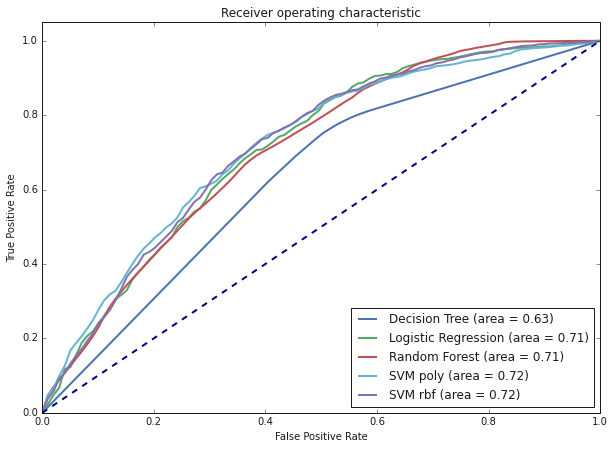

In [279]:



X = np.array(bdp.drop('Dependencia', axis = 1))

Y = np.array(bdp['Dependencia'])
Y = (Y == 'Presente').astype(int)

SSS_cv = StratifiedShuffleSplit(n_splits=10,test_size=0.3)

dict_arbol = {'accuracy':[], 'sensitivity':[], 'specificity':[],'precision':[],'F1':[],'roc':[]}
dict_logir = {'accuracy':[], 'sensitivity':[], 'specificity':[],'precision':[],'F1':[],'roc':[]}
dict_rdfor = {'accuracy':[], 'sensitivity':[], 'specificity':[],'precision':[],'F1':[],'roc':[]}
dict_svmcl1= {'accuracy':[], 'sensitivity':[], 'specificity':[],'precision':[],'F1':[],'roc':[]}
dict_svmcl2= {'accuracy':[], 'sensitivity':[], 'specificity':[],'precision':[],'F1':[],'roc':[]}

for train_index, test_index in SSS_cv.split(X,Y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        #clf1        
        clf1       = DecisionTreeClassifier()
        clf1.fit(X_train, y_train)
        y_pred     = clf1.predict(X_test)
        prob       = clf1.predict_proba(X_test)
        scores     = prob[:,1]        
        dict_arbol = get_metrics(y_test,y_pred,dict_arbol,scores)
        #clf2
        clf2 = LogisticRegression(solver='lbfgs', max_iter=1000)
        clf2.fit(X_train, y_train)
        y_pred = clf2.predict(X_test)
        prob       = clf2.predict_proba(X_test)
        scores     = prob[:,1]        
        dict_logir = get_metrics(y_test,y_pred,dict_logir,scores)
        #clf3
        clf3 = RandomForestClassifier(n_estimators = 20,random_state = 33)
        clf3.fit(X_train, y_train)
        y_pred = clf3.predict(X_test)
        prob       = clf3.predict_proba(X_test)
        scores     = prob[:,1]        
        dict_rdfor = get_metrics(y_test,y_pred,dict_rdfor,scores)
        
        #clf4
        scaler = Normalizer()
        scaler.fit(X_train)
        X_train1 = scaler.transform(X_train)
        X_test1 = scaler.transform(X_test)
        #'C': 1, 'degree': 2, 'gamma': 5, 'kernel': 'poly' #with norm
        clf4 = SVC(C=1, degree=2, gamma=5, kernel='poly')
        clf4.fit(X_train1, y_train)
        y_pred = clf4.predict(X_test1)
        scores       = clf4.decision_function(X_test1)
               
        dict_svmcl1 = get_metrics(y_test,y_pred,dict_svmcl1,scores)
    
        #clf5
        C = 10  # parametro de regularizacion de la svm
        gamma=3
        #train    
        clf5 = SVC(kernel='rbf', gamma=gamma, C=C)
        clf5.fit(X_train1, y_train)
        y_pred = clf5.predict(X_test1)
        scores       = clf5.decision_function(X_test1)     
        dict_svmcl2 = get_metrics(y_test,y_pred,dict_svmcl2,scores)
        
print('results')

clf_dict = {'Decision Tree':dict_arbol,'Logistic Regression':dict_logir,'Random Forest':dict_rdfor,'SVM poly':dict_svmcl1,'SVM rbf':dict_svmcl2}
keys = clf_dict.keys()
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,7))
lw=2 

for clf in keys:
    rest_dic = clf_dict[clf]
    per_metrics = rest_dic.keys()
    print(f'\nClassifier: {clf} ')
    for metric in per_metrics:
        if metric != 'roc':
            avg = np.mean(rest_dic[metric])*100
            std = np.std(rest_dic[metric])*100
            print(f'{metric} = {avg} +- {std}')
        else:
            
            tprs=[]
            aucs=[]
            for i in range(len(rest_dic['roc'])):
                fpr=rest_dic['roc'][i][0]
                tpr=rest_dic['roc'][i][1]
                aucs.append(rest_dic['roc'][i][2])
                interp_tpr = np.interp(mean_fpr, fpr, tpr)
                interp_tpr[0] = 0.0
                tprs.append(interp_tpr)
            mean_auc=np.mean(aucs)
            std_auc=np.std(aucs)
            mean_tpr = np.mean(tprs, axis=0)
            mean_tpr[-1] = 1.0
            plt.plot(mean_fpr, mean_tpr, lw=lw, label=clf+' (area = %0.2f)' % mean_auc)
            
            print(f'{metric} = {mean_auc} +- {std_auc}')
plt.legend(loc="lower right")            

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver operating characteristic")            

results

Classifier: Decision Tree 
accuracy = 67.80979827089337 +- 2.5025628634425914
sensitivity = 75.60975609756098 +- 2.7450313847372563
specificity = 48.811881188118825 +- 6.104183224474595
precision = 78.29048438752037 +- 2.093775052421885
F1 = 76.89508269499954 +- 1.885583304821415
roc = 0.622108186428399 +- 0.03220866347279344

Classifier: Logistic Regression 
accuracy = 74.66858789625361 +- 2.4972474444829884
sensitivity = 89.75609756097562 +- 2.187581145865643
specificity = 37.92079207920792 +- 5.107414010506506
precision = 77.89484388741998 +- 1.6274556157654556
F1 = 83.3964770824253 +- 1.6603939912033954
roc = 0.6946430008854544 +- 0.04381180331179518

Classifier: Random Forest 
accuracy = 74.78386167146974 +- 2.038790334965302
sensitivity = 90.12195121951221 +- 2.8048780487804876
specificity = 37.42574257425743 +- 4.946533068038336
precision = 77.83613888176907 +- 1.2868820803450818
F1 = 83.5046625139598 +- 1.4606147116402621
roc = 0.7063491105208082 +- 0.0378193053432722


Text(0.5, 1.0, 'Receiver operating characteristic')

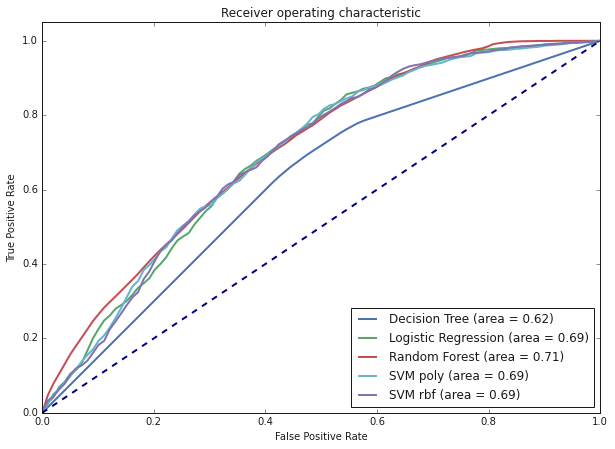

In [280]:
X = np.array(bdp_E.drop('Dependencia', axis = 1))

Y = np.array(bdp_E['Dependencia'])
Y = (Y == 'Presente').astype(int)

SSS_cv = StratifiedShuffleSplit(n_splits=10,test_size=0.3)

dict_arbol = {'accuracy':[], 'sensitivity':[], 'specificity':[],'precision':[],'F1':[],'roc':[]}
dict_logir = {'accuracy':[], 'sensitivity':[], 'specificity':[],'precision':[],'F1':[],'roc':[]}
dict_rdfor = {'accuracy':[], 'sensitivity':[], 'specificity':[],'precision':[],'F1':[],'roc':[]}
dict_svmcl1= {'accuracy':[], 'sensitivity':[], 'specificity':[],'precision':[],'F1':[],'roc':[]}
dict_svmcl2= {'accuracy':[], 'sensitivity':[], 'specificity':[],'precision':[],'F1':[],'roc':[]}

for train_index, test_index in SSS_cv.split(X,Y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        #clf1        
        clf1       = DecisionTreeClassifier()
        clf1.fit(X_train, y_train)
        y_pred     = clf1.predict(X_test)
        prob       = clf1.predict_proba(X_test)
        scores     = prob[:,1]        
        dict_arbol = get_metrics(y_test,y_pred,dict_arbol,scores)
        #clf2
        clf2 = LogisticRegression(solver='lbfgs', max_iter=1000)
        clf2.fit(X_train, y_train)
        y_pred = clf2.predict(X_test)
        prob       = clf2.predict_proba(X_test)
        scores     = prob[:,1]        
        dict_logir = get_metrics(y_test,y_pred,dict_logir,scores)
        #clf3
        clf3 = RandomForestClassifier(n_estimators = 20,random_state = 33)
        clf3.fit(X_train, y_train)
        y_pred = clf3.predict(X_test)
        prob       = clf3.predict_proba(X_test)
        scores     = prob[:,1]        
        dict_rdfor = get_metrics(y_test,y_pred,dict_rdfor,scores)
        
        #clf4
        scaler = Normalizer()
        scaler.fit(X_train)
        X_train1 = scaler.transform(X_train)
        X_test1 = scaler.transform(X_test)
        #'C': 1, 'degree': 2, 'gamma': 5, 'kernel': 'poly' #with norm
        clf4 = SVC(C=1, degree=2, gamma=5, kernel='poly')
        clf4.fit(X_train1, y_train)
        y_pred = clf4.predict(X_test1)
        scores       = clf4.decision_function(X_test1)
               
        dict_svmcl1 = get_metrics(y_test,y_pred,dict_svmcl1,scores)
    
        #clf5
        C = 10  # parametro de regularizacion de la svm
        gamma=3
        #train    
        clf5 = SVC(kernel='rbf', gamma=gamma, C=C)
        clf5.fit(X_train1, y_train)
        y_pred = clf5.predict(X_test1)
        scores       = clf5.decision_function(X_test1)     
        dict_svmcl2 = get_metrics(y_test,y_pred,dict_svmcl2,scores)
        
print('results')

clf_dict = {'Decision Tree':dict_arbol,'Logistic Regression':dict_logir,'Random Forest':dict_rdfor,'SVM poly':dict_svmcl1,'SVM rbf':dict_svmcl2}
keys = clf_dict.keys()
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,7))
lw=2 


for clf in keys:
    rest_dic = clf_dict[clf]
    per_metrics = rest_dic.keys()
    print(f'\nClassifier: {clf} ')
    for metric in per_metrics:
        if metric != 'roc':
            avg = np.mean(rest_dic[metric])*100
            std = np.std(rest_dic[metric])*100
            print(f'{metric} = {avg} +- {std}')
        else:
            
            tprs=[]
            aucs=[]
            for i in range(len(rest_dic['roc'])):
                fpr=rest_dic['roc'][i][0]
                tpr=rest_dic['roc'][i][1]
                aucs.append(rest_dic['roc'][i][2])
                interp_tpr = np.interp(mean_fpr, fpr, tpr)
                interp_tpr[0] = 0.0
                tprs.append(interp_tpr)
            mean_auc=np.mean(aucs)
            std_auc=np.std(aucs)
            mean_tpr = np.mean(tprs, axis=0)
            mean_tpr[-1] = 1.0
            plt.plot(mean_fpr, mean_tpr, lw=lw, label=clf+' (area = %0.2f)' % mean_auc)
            
            print(f'{metric} = {mean_auc} +- {std_auc}')
plt.legend(loc="lower right")            

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver operating characteristic")            

results

Classifier: Decision Tree 
accuracy = 68.69565217391305 +- 2.510218561694026
sensitivity = 77.3360655737705 +- 3.849187658830675
specificity = 47.821782178217816 +- 4.248205535232661
precision = 78.17517946496051 +- 1.3208646035520828
F1 = 77.70642799286243 +- 2.2417120514687268
roc = 0.6257892387599415 +- 0.022379000537355073

Classifier: Logistic Regression 
accuracy = 74.84057971014492 +- 1.9564680615288366
sensitivity = 90.61475409836065 +- 2.4068929278731206
specificity = 36.73267326732673 +- 2.9186936580165685
precision = 77.57682882992565 +- 0.9574318141054573
F1 = 83.58002473404484 +- 1.4091330622594873
roc = 0.7061475409836065 +- 0.028857198957893824

Classifier: Random Forest 
accuracy = 74.89855072463769 +- 1.870407629553819
sensitivity = 91.51639344262297 +- 2.318745108166497
specificity = 34.75247524752475 +- 4.778189509708378
precision = 77.23030058819475 +- 1.2547853038652867
F1 = 83.7514535466117 +- 1.273854312406825
roc = 0.7073648758318456 +- 0.02447460584458

Text(0.5, 1.0, 'Receiver operating characteristic')

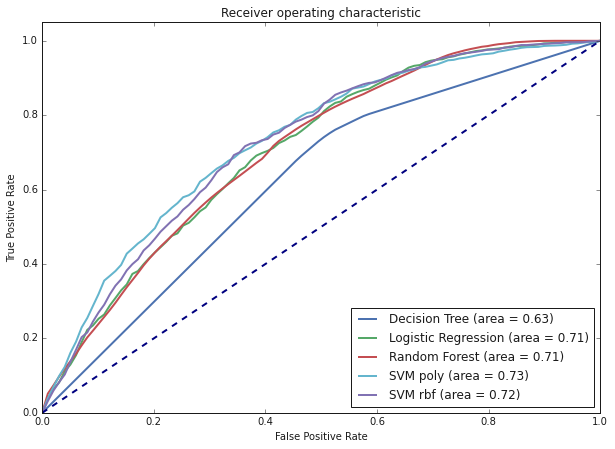

In [281]:
X = np.array(bdp1.drop('Dependencia', axis = 1))

Y = np.array(bdp1['Dependencia'])
Y = (Y == 'Presente').astype(int)

SSS_cv = StratifiedShuffleSplit(n_splits=10,test_size=0.3)

dict_arbol = {'accuracy':[], 'sensitivity':[], 'specificity':[],'precision':[],'F1':[],'roc':[]}
dict_logir = {'accuracy':[], 'sensitivity':[], 'specificity':[],'precision':[],'F1':[],'roc':[]}
dict_rdfor = {'accuracy':[], 'sensitivity':[], 'specificity':[],'precision':[],'F1':[],'roc':[]}
dict_svmcl1= {'accuracy':[], 'sensitivity':[], 'specificity':[],'precision':[],'F1':[],'roc':[]}
dict_svmcl2= {'accuracy':[], 'sensitivity':[], 'specificity':[],'precision':[],'F1':[],'roc':[]}

for train_index, test_index in SSS_cv.split(X,Y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        #clf1        
        clf1       = DecisionTreeClassifier()
        clf1.fit(X_train, y_train)
        y_pred     = clf1.predict(X_test)
        prob       = clf1.predict_proba(X_test)
        scores     = prob[:,1]        
        dict_arbol = get_metrics(y_test,y_pred,dict_arbol,scores)
        #clf2
        clf2 = LogisticRegression(solver='lbfgs', max_iter=1000)
        clf2.fit(X_train, y_train)
        y_pred = clf2.predict(X_test)
        prob       = clf2.predict_proba(X_test)
        scores     = prob[:,1]        
        dict_logir = get_metrics(y_test,y_pred,dict_logir,scores)
        #clf3
        clf3 = RandomForestClassifier(n_estimators = 20,random_state = 33)
        clf3.fit(X_train, y_train)
        y_pred = clf3.predict(X_test)
        prob       = clf3.predict_proba(X_test)
        scores     = prob[:,1]        
        dict_rdfor = get_metrics(y_test,y_pred,dict_rdfor,scores)
        
        #clf4
        scaler = Normalizer()
        scaler.fit(X_train)
        X_train1 = scaler.transform(X_train)
        X_test1 = scaler.transform(X_test)
        #'C': 1, 'degree': 2, 'gamma': 5, 'kernel': 'poly' #with norm
        clf4 = SVC(C=1, degree=2, gamma=5, kernel='poly')
        clf4.fit(X_train1, y_train)
        y_pred = clf4.predict(X_test1)
        scores       = clf4.decision_function(X_test1)
               
        dict_svmcl1 = get_metrics(y_test,y_pred,dict_svmcl1,scores)
    
        #clf5
        C = 10  # parametro de regularizacion de la svm
        gamma=3
        #train    
        clf5 = SVC(kernel='rbf', gamma=gamma, C=C)
        clf5.fit(X_train1, y_train)
        y_pred = clf5.predict(X_test1)
        scores       = clf5.decision_function(X_test1)     
        dict_svmcl2 = get_metrics(y_test,y_pred,dict_svmcl2,scores)
        
print('results')

clf_dict = {'Decision Tree':dict_arbol,'Logistic Regression':dict_logir,'Random Forest':dict_rdfor,'SVM poly':dict_svmcl1,'SVM rbf':dict_svmcl2}
keys = clf_dict.keys()
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,7))
lw=2 


for clf in keys:
    rest_dic = clf_dict[clf]
    per_metrics = rest_dic.keys()
    print(f'\nClassifier: {clf} ')
    for metric in per_metrics:
        if metric != 'roc':
            avg = np.mean(rest_dic[metric])*100
            std = np.std(rest_dic[metric])*100
            print(f'{metric} = {avg} +- {std}')
        else:
            
            tprs=[]
            aucs=[]
            for i in range(len(rest_dic['roc'])):
                fpr=rest_dic['roc'][i][0]
                tpr=rest_dic['roc'][i][1]
                aucs.append(rest_dic['roc'][i][2])
                interp_tpr = np.interp(mean_fpr, fpr, tpr)
                interp_tpr[0] = 0.0
                tprs.append(interp_tpr)
            mean_auc=np.mean(aucs)
            std_auc=np.std(aucs)
            mean_tpr = np.mean(tprs, axis=0)
            mean_tpr[-1] = 1.0
            plt.plot(mean_fpr, mean_tpr, lw=lw, label=clf+' (area = %0.2f)' % mean_auc)
            
            print(f'{metric} = {mean_auc} +- {std_auc}')
plt.legend(loc="lower right")            

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver operating characteristic")            

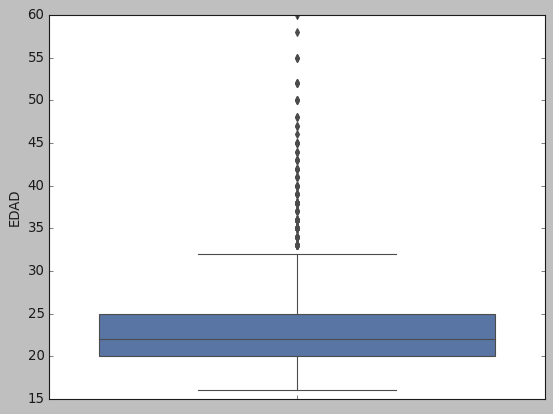

In [51]:
sns.boxplot(data=bd,y= 'EDAD')

In [52]:
bd["EDAD"].describe()

count    1229.000000
mean       23.465686
std         6.096039
min        16.000000
25%        20.000000
50%        22.000000
75%        25.000000
max        60.000000
Name: EDAD, dtype: float64

In [100]:
bdp["EDAD"].describe()

count    1149.000000
mean       23.370757
std         6.133962
min        16.000000
25%        19.000000
50%        22.000000
75%        25.000000
max        60.000000
Name: EDAD, dtype: float64

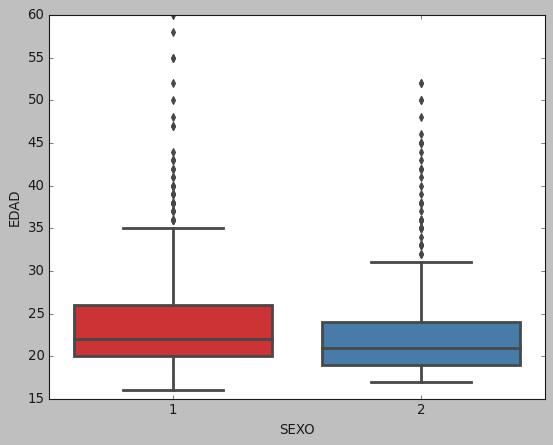

In [53]:
sns.boxplot(data=bd,y= 'EDAD',x='SEXO',palette="Set1",linewidth=2.5)

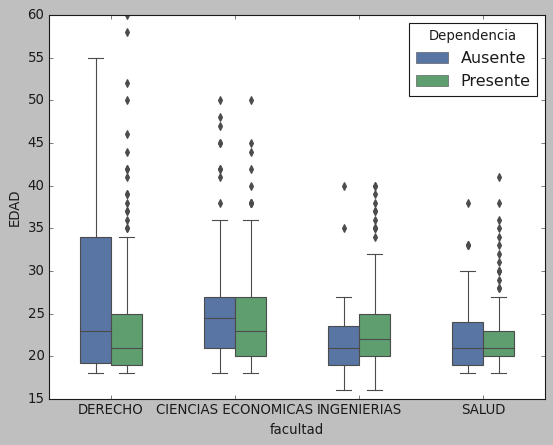

In [54]:
sns.boxplot(data=bd,y= 'EDAD',x='facultad',hue='Dependencia', hue_order=("Ausente","Presente"),width=0.5)

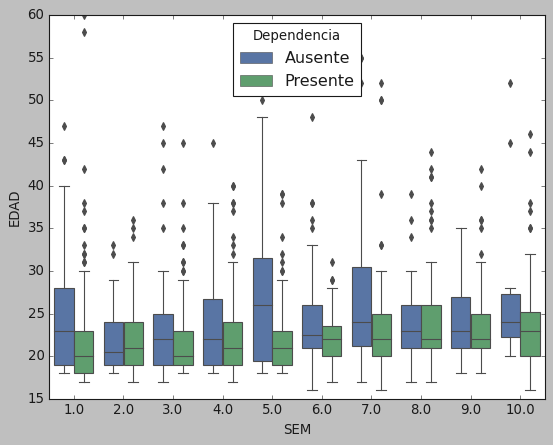

In [55]:
sns.boxplot(x='SEM',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)

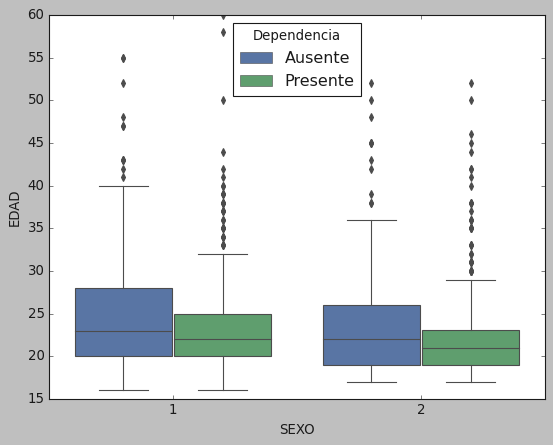

In [56]:
sns.boxplot(x="SEXO",y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)

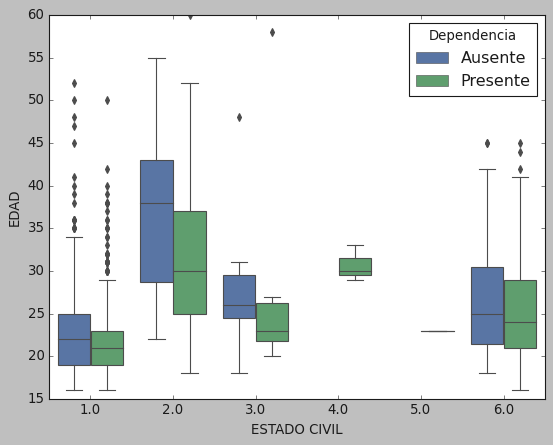

In [57]:
sns.boxplot(x='ESTADO CIVIL',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)

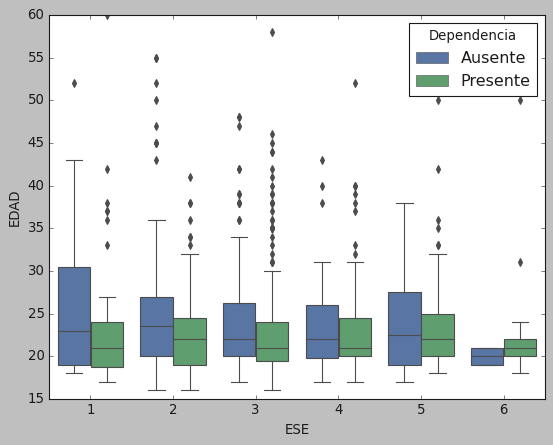

In [58]:
sns.boxplot(x='ESE',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)

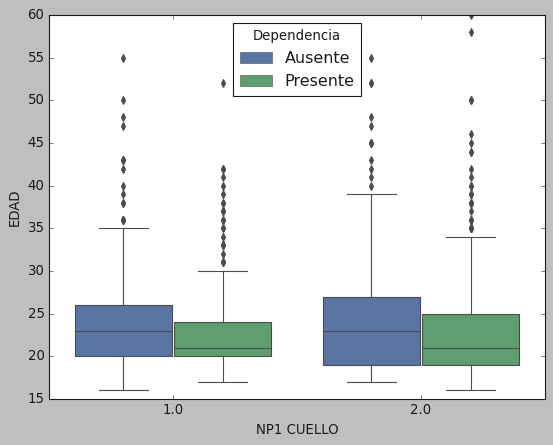

In [59]:
sns.boxplot(x='NP1 CUELLO',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)


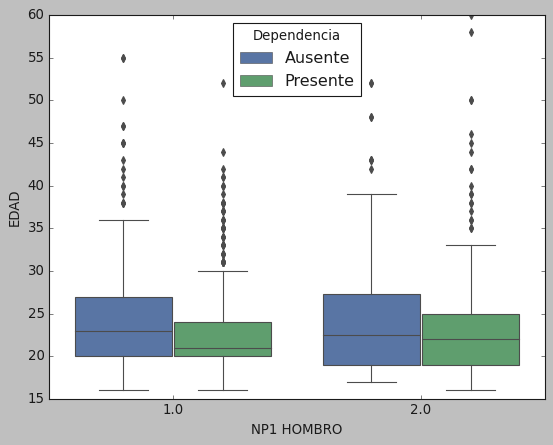

In [60]:
sns.boxplot(x='NP1 HOMBRO',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)


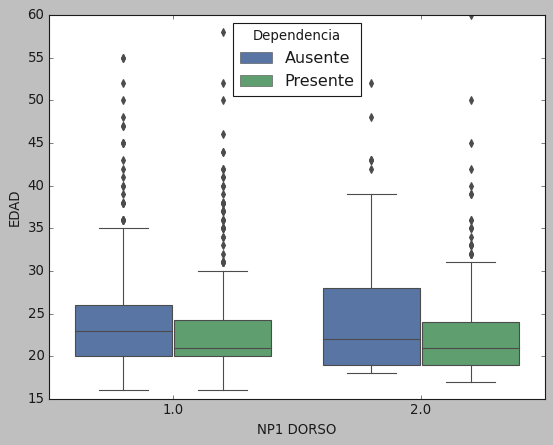

In [61]:
sns.boxplot(x='NP1 DORSO',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)


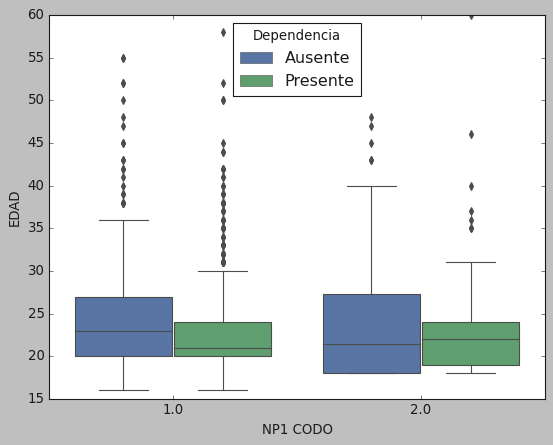

In [62]:
sns.boxplot(x='NP1 CODO',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)


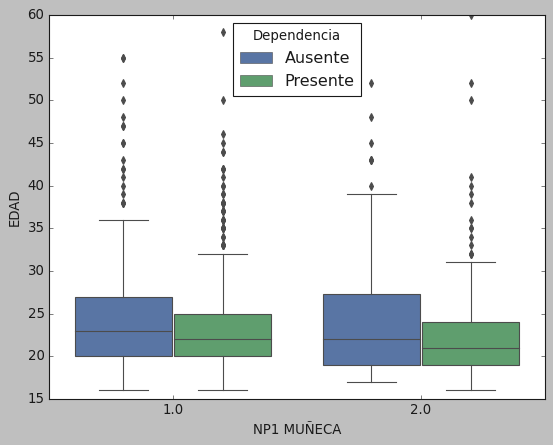

In [63]:
sns.boxplot(x='NP1 MUÑECA',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)

       

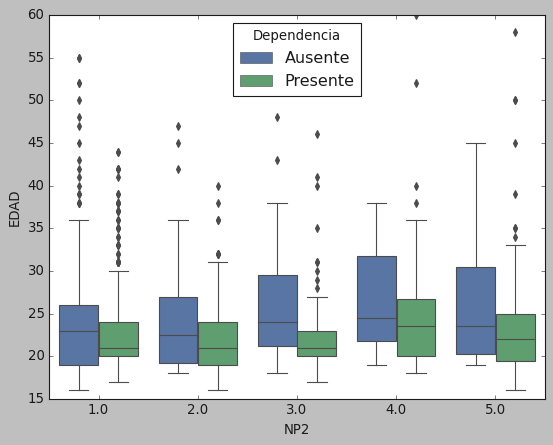

In [64]:
sns.boxplot(x='NP2' ,y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)


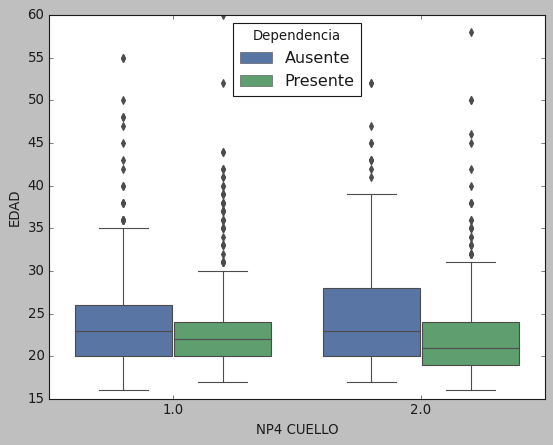

In [65]:
sns.boxplot(x='NP4 CUELLO',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)


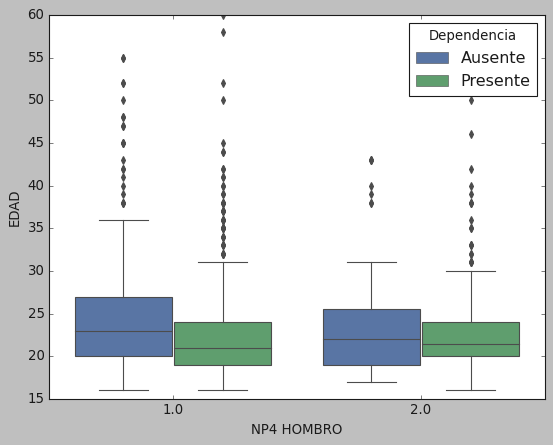

In [66]:
sns.boxplot(x='NP4 HOMBRO',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)


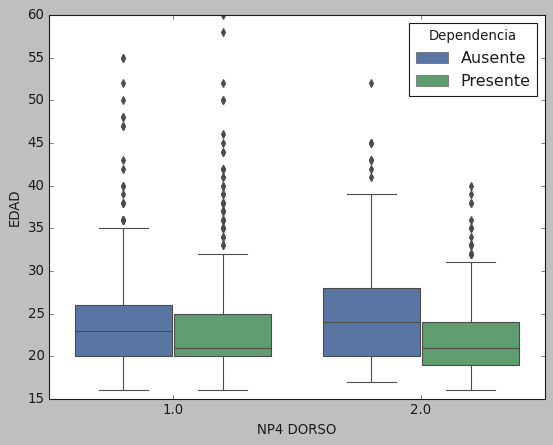

In [67]:
sns.boxplot(x='NP4 DORSO' ,y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)


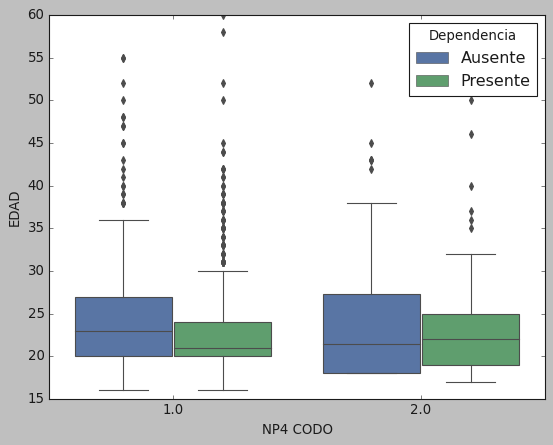

In [68]:
sns.boxplot(x='NP4 CODO',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)       

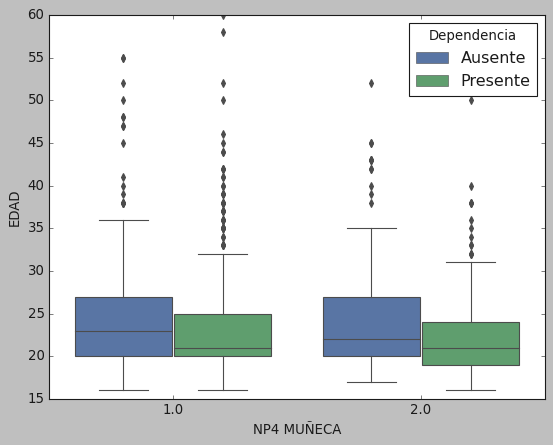

In [69]:
sns.boxplot(x='NP4 MUÑECA',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)


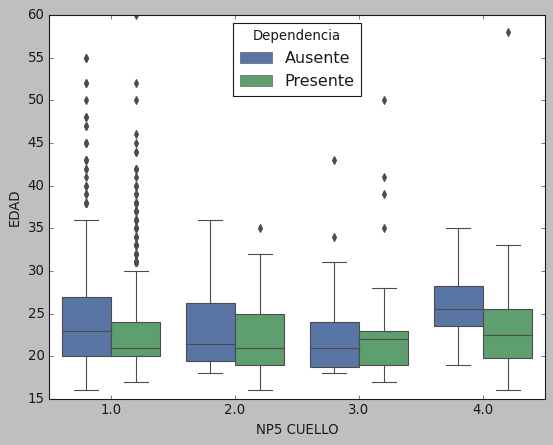

In [70]:
sns.boxplot(x='NP5 CUELLO',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)
 

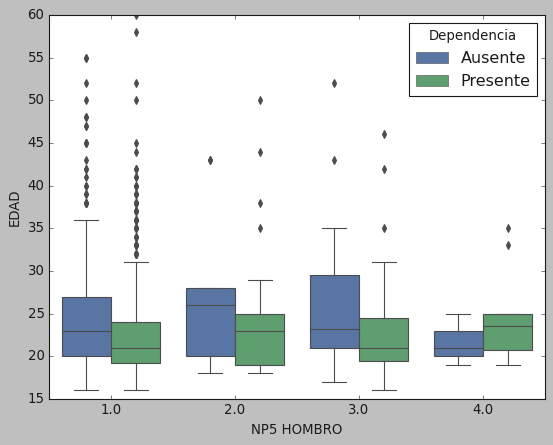

In [71]:
sns.boxplot(x='NP5 HOMBRO' ,y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)


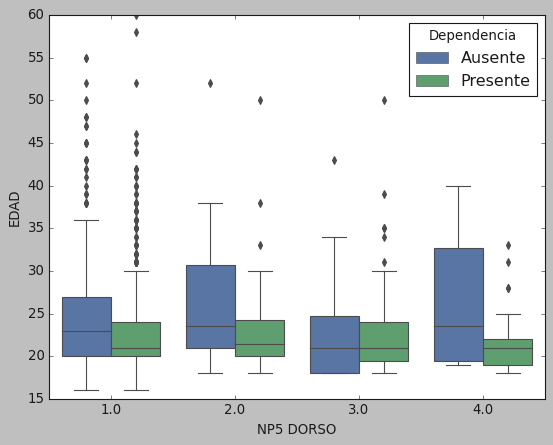

In [72]:
sns.boxplot(x='NP5 DORSO',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)


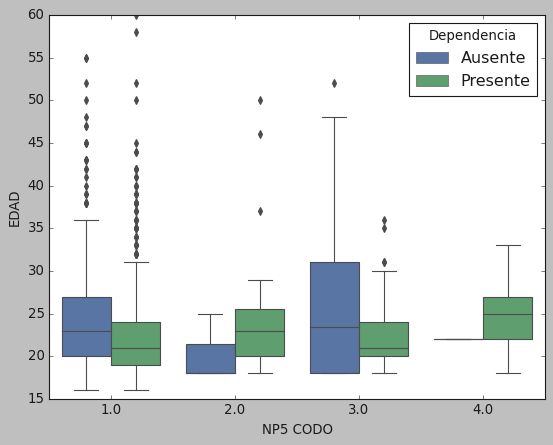

In [73]:
sns.boxplot(x='NP5 CODO',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)

       

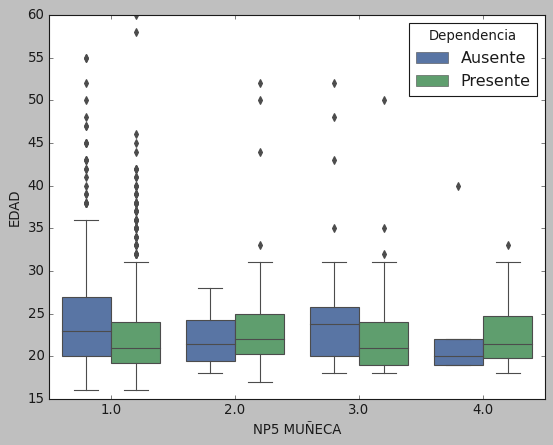

In [74]:
sns.boxplot(x='NP5 MUÑECA',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)
 

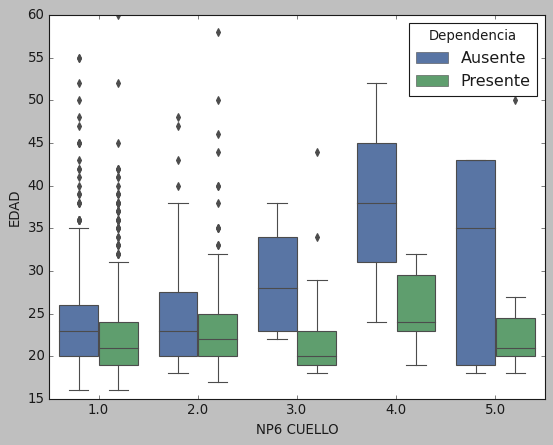

In [75]:
sns.boxplot(x='NP6 CUELLO',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)


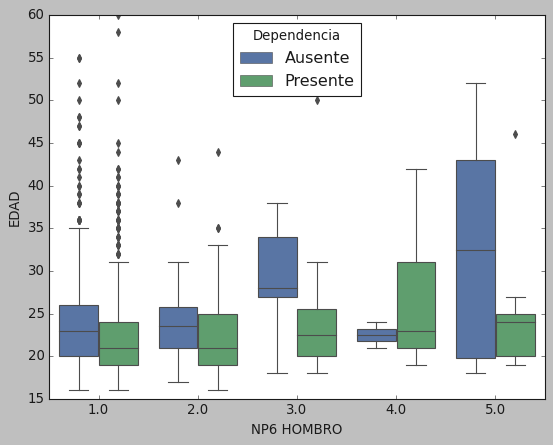

In [76]:
sns.boxplot(x='NP6 HOMBRO',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)
 

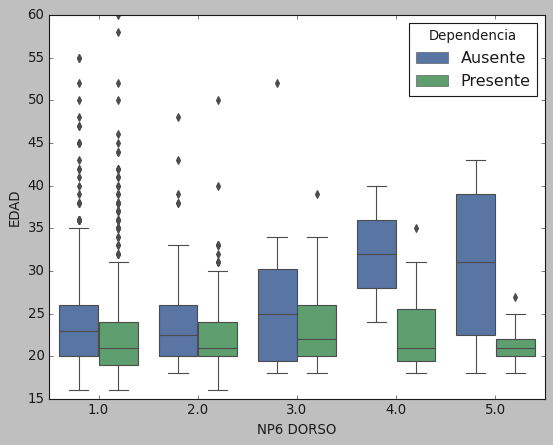

In [77]:
sns.boxplot(x='NP6 DORSO',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)


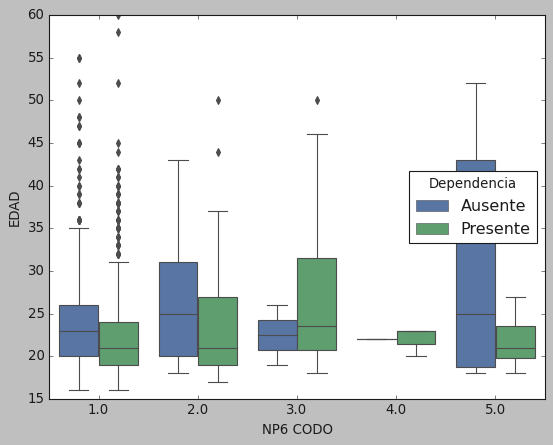

In [78]:
sns.boxplot(x='NP6 CODO',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)

       

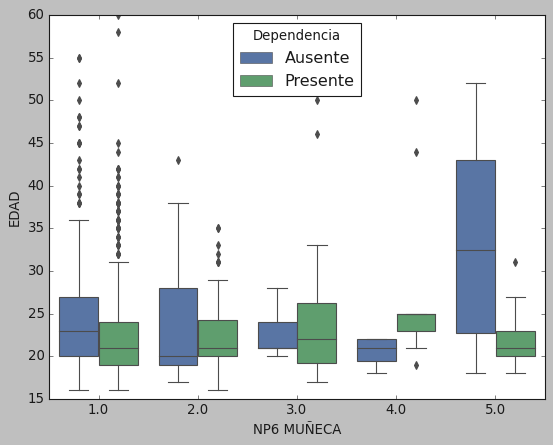

In [79]:
sns.boxplot(x='NP6 MUÑECA',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)
 

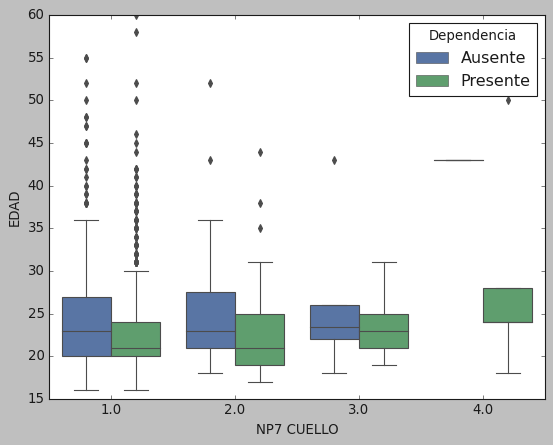

In [80]:
sns.boxplot(x='NP7 CUELLO',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)
 

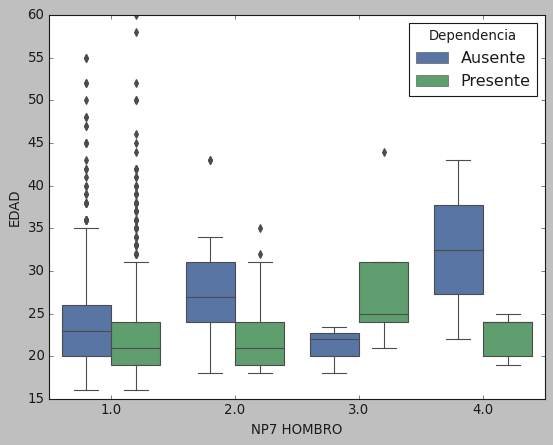

In [81]:
sns.boxplot(x='NP7 HOMBRO',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)
 

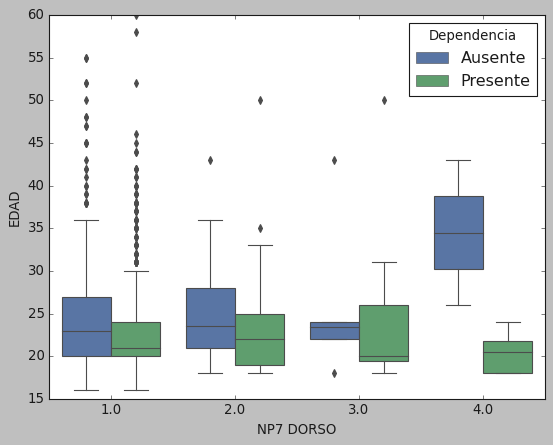

In [82]:
sns.boxplot(x='NP7 DORSO',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)
 

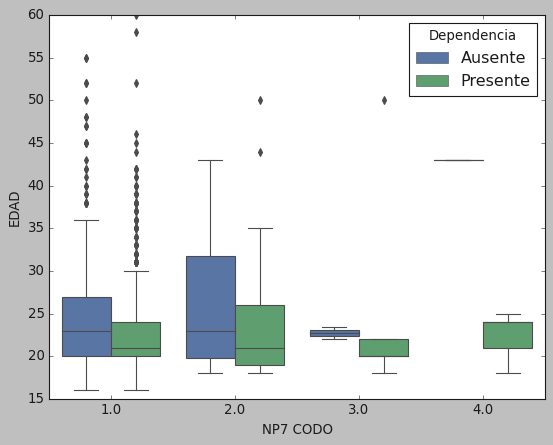

In [83]:
sns.boxplot(x='NP7 CODO',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)

       

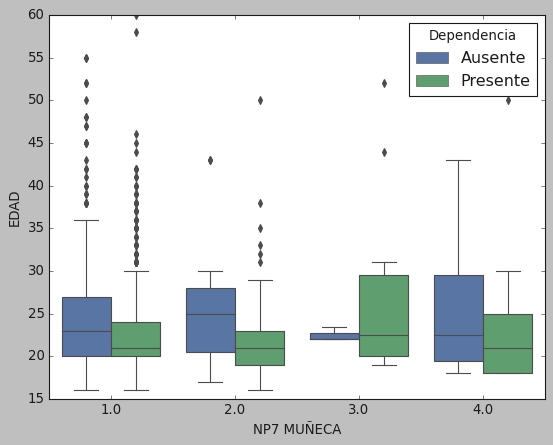

In [84]:
sns.boxplot(x='NP7 MUÑECA',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)
 

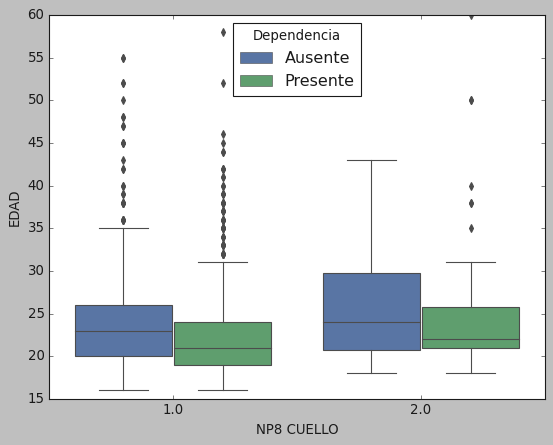

In [85]:
sns.boxplot(x='NP8 CUELLO',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)
 

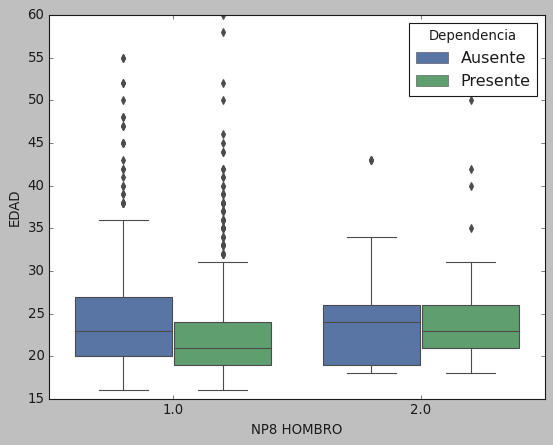

In [86]:
sns.boxplot(x='NP8 HOMBRO',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)
 

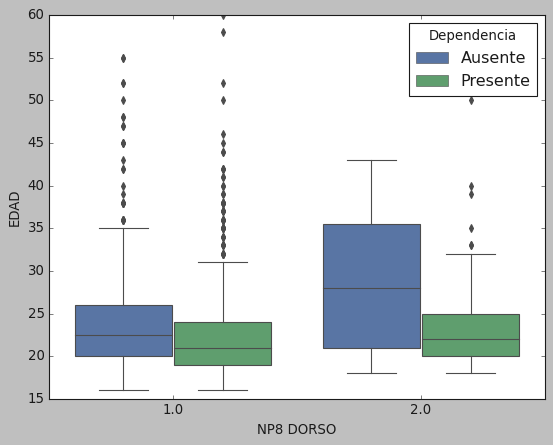

In [87]:
sns.boxplot(x='NP8 DORSO',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)
 

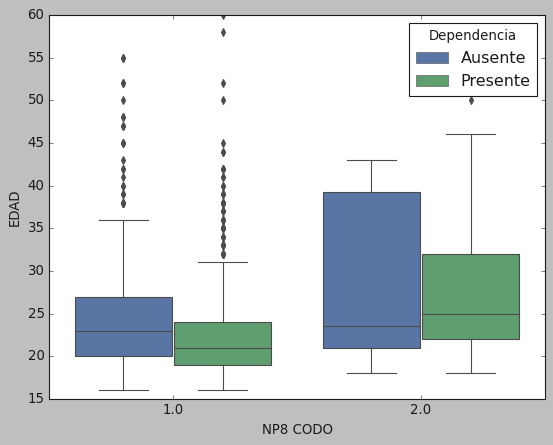

In [88]:
sns.boxplot(x='NP8 CODO',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)

       

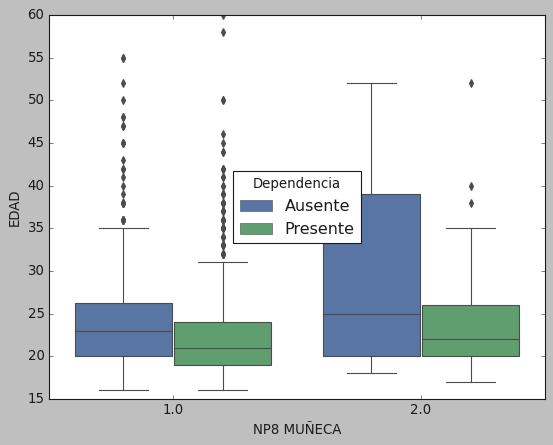

In [89]:
sns.boxplot(x='NP8 MUÑECA',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)
 

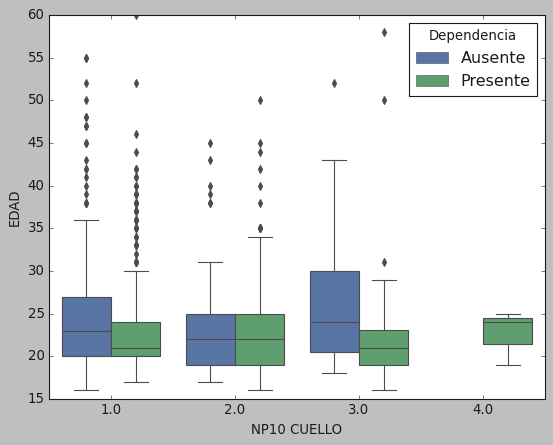

In [90]:
sns.boxplot(x='NP10 CUELLO',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)
 

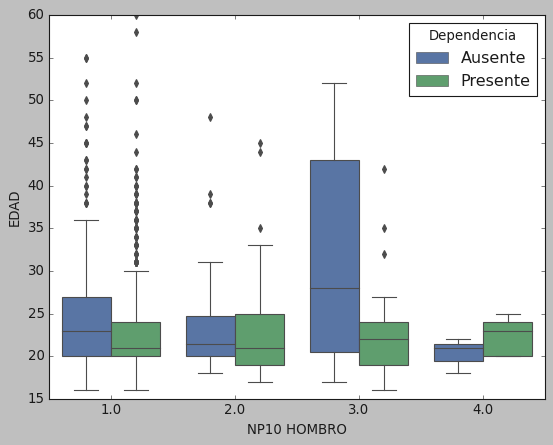

In [91]:
sns.boxplot(x='NP10 HOMBRO',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)
 

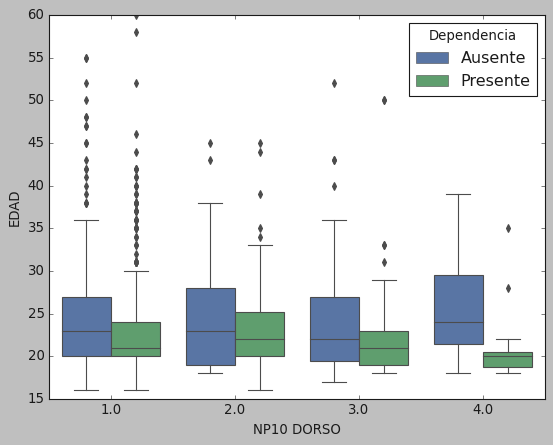

In [92]:
sns.boxplot(x='NP10 DORSO',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)
 

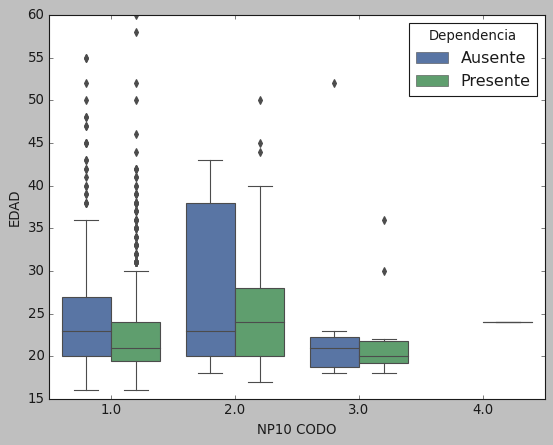

In [93]:
sns.boxplot(x='NP10 CODO',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)
  

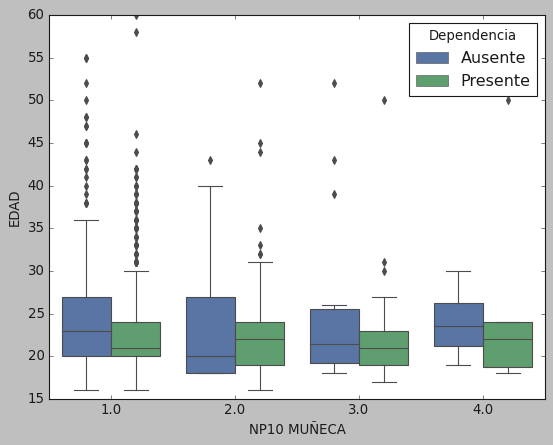

In [94]:
 sns.boxplot(x='NP10 MUÑECA',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)
    

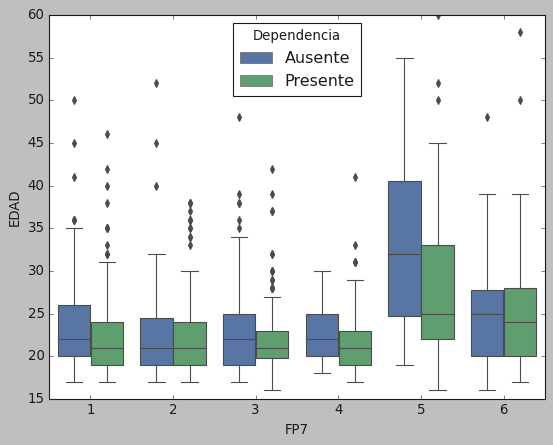

In [95]:
#CON QUIEN VIVE 1=AMBOS PADRES 2=CON PADRE/MADRE  3=CON OTRO MIEMBRO DE LA FAMILIA 
#4=CON AMIGO 5=CON NOVIO/ESPOSO 6=SOLO
sns.boxplot(x='FP7',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)

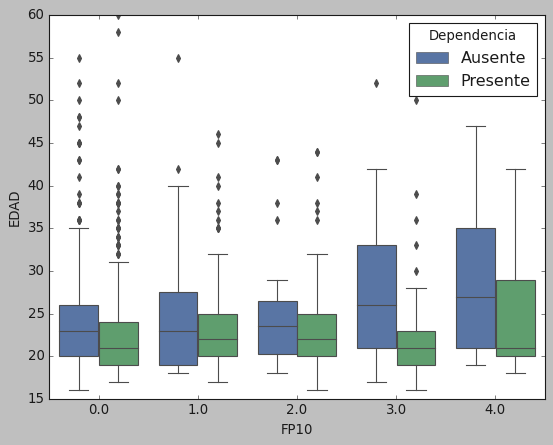

In [96]:
#EXISTEN NORMAS PARA EL USO DEL CEL EN SU CASA 
sns.boxplot(x='FP10' ,y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)

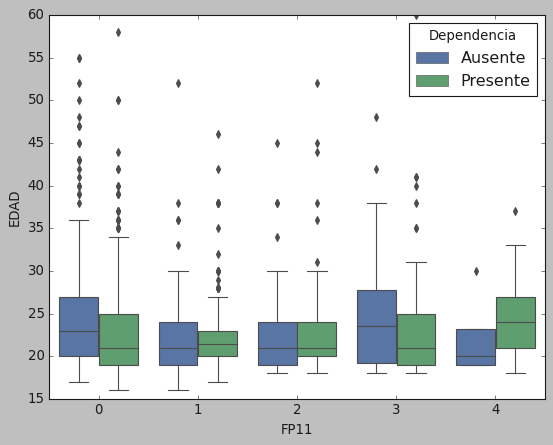

In [97]:
 #PUEDE SER DISCRIMINADO POR NO TENER CEL 
sns.boxplot(x='FP11',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)

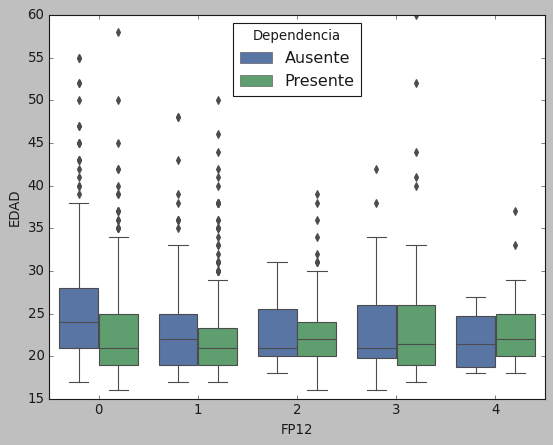

In [98]:
#DISCUSIONES POR PASAR MUCHO TIEMPO EN EL CEL
sns.boxplot(x='FP12',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)
       

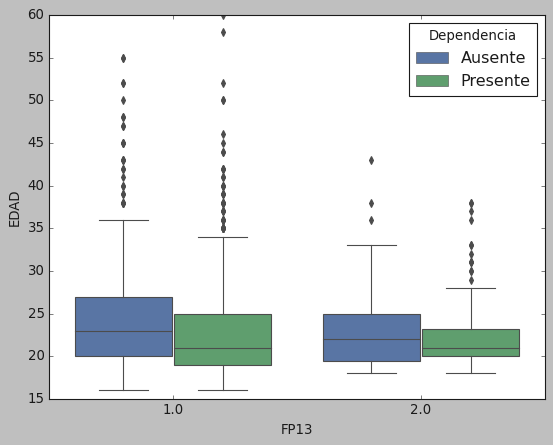

In [99]:
#ZONA RESIDENCIA 1=URBANA 2=RURAL
sns.boxplot(x='FP13',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)

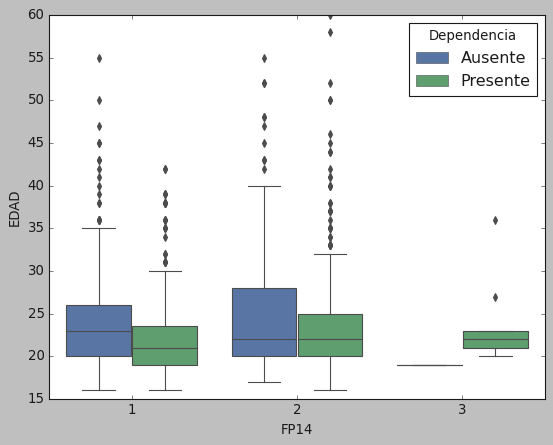

In [100]:
 #TIPO DE ACCESO A LA RED  1=DATOS MOVILES 2=WIFI 3=AMBAS
sns.boxplot(x='FP14',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)

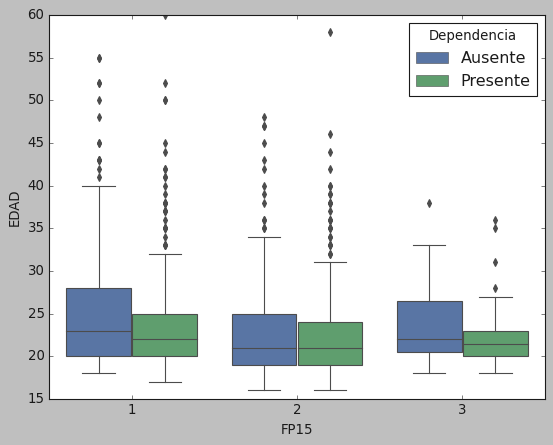

In [101]:
 #ESPACIOS DE MAYOR USO DEL CEL 1=CASA 2=UNIVERSIDAD 3=CENTROS COMERCIALES
sns.boxplot(x='FP15',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)

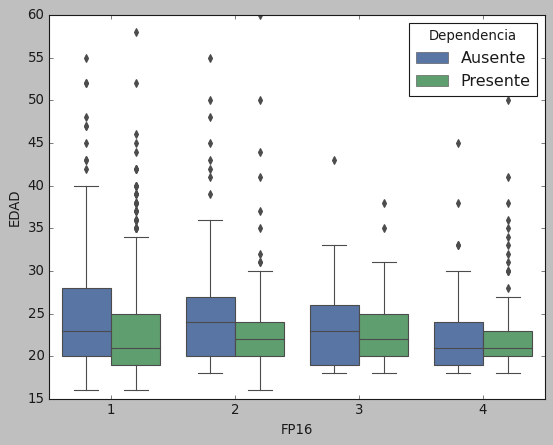

In [102]:

sns.boxplot(x='FP16',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)

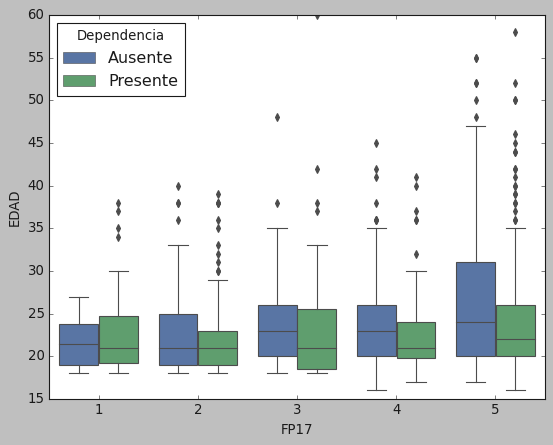

In [103]:
 #TIEMPO DE ADQUISICION DE SU PRIMER CEL  1=MENOS DE 6 MESES  2= 6 MESES-1 AÑO  3=  1-3 AÑOS  
#4= 3-6 AÑOS  5= MAS DE 6 AÑOS
sns.boxplot(x='FP17',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)

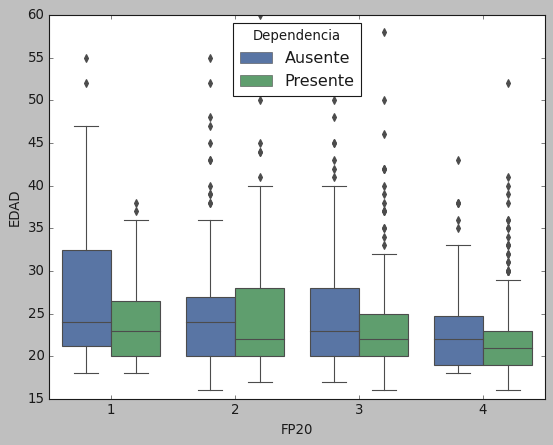

In [104]:
 #TIEMPO PROM DE USO/DIA  1= MENOS DE 1 HORA  2= 1-3 HORAS  3= 3-6 HORAS  4= MAS DE 6 H
sns.boxplot(x='FP20',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)

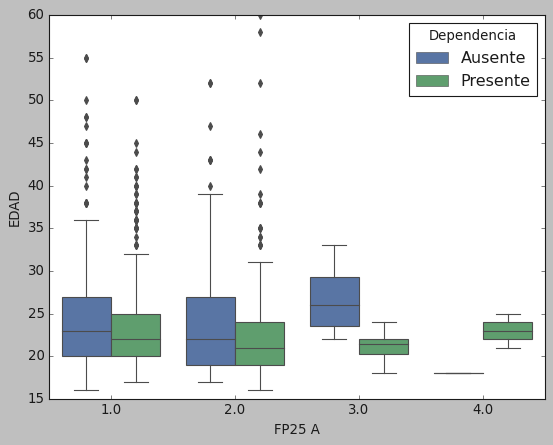

In [105]:
 #DE PIE  1= MENOS 1 HORA	2= 1 - 2:59 HORAS	3= 3-6 HORAS	4= MAS DE 6 HRS
sns.boxplot(x='FP25 A',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)

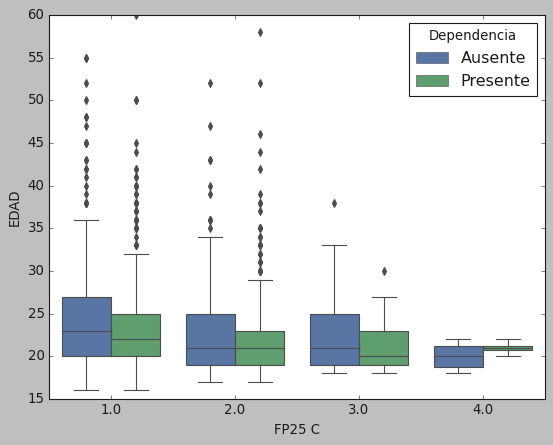

In [106]:
#SENTADO EN PISO	1= MENOS 1 HORA	2= 1 - 2:59 HORAS	3= 3-6 HORAS	4= MAS DE 6 HRS
sns.boxplot(x='FP25 C',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)
      

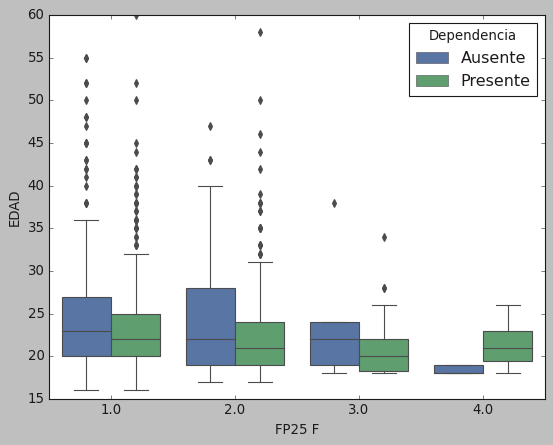

In [107]:
 #ACOSTADO MEDIO LADO	1= MENOS 1 HORA	2= 1 - 2:59 HORAS	3= 3-6 HORAS	4= MAS DE 6 HRS

sns.boxplot(x='FP25 F',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)

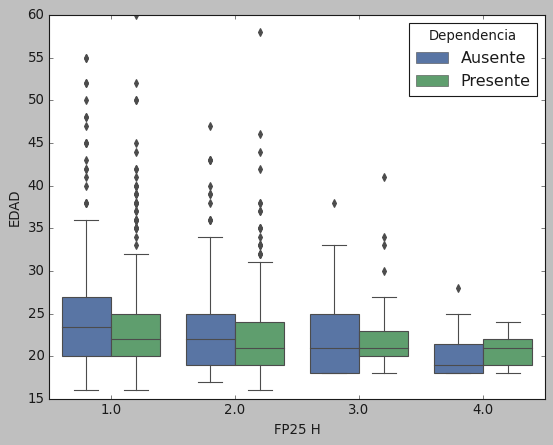

In [108]:
#ACOSTADO BOCA ARRIBA	1= MENOS 1 HORA	2= 1 - 2:59 HORAS	3= 3-6 HORAS	4= MAS DE 6 HRS
sns.boxplot(x='FP25 H',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)

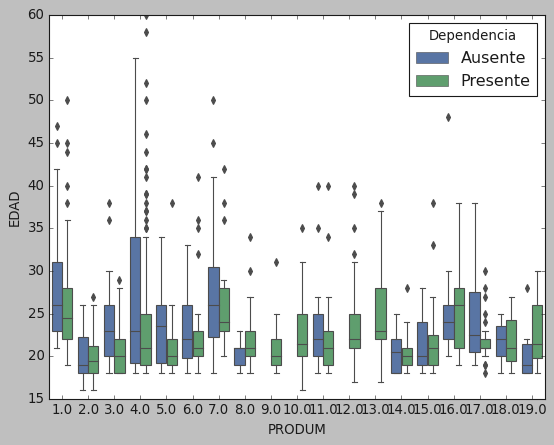

In [109]:
sns.boxplot(x='PRODUM',y="EDAD",hue="Dependencia",hue_order=("Ausente","Presente"),data=bd)

# CHI 2

In [110]:
tabla1= pd.crosstab(bd['Dependencia'], bd['PRODUM'],margins=True,margins_name="total")
tabla1
chi2_contingency(tabla1)

(204.7065175807727,
 1.0161698150565316e-24,
 38,
 array([[  18.72557003,   17.83387622,   18.72557003,   87.68322476,
           18.72557003,   20.50895765,   18.72557003,   14.56433225,
            8.61970684,   17.83387622,   17.83387622,   17.83387622,
           17.83387622,   10.40309446,   16.64495114,   14.26710098,
           12.18648208,    8.0252443 ,    8.0252443 ,  365.        ],
        [  44.27442997,   42.16612378,   44.27442997,  207.31677524,
           44.27442997,   48.49104235,   44.27442997,   34.43566775,
           20.38029316,   42.16612378,   42.16612378,   42.16612378,
           42.16612378,   24.59690554,   39.35504886,   33.73289902,
           28.81351792,   18.9747557 ,   18.9747557 ,  863.        ],
        [  63.        ,   60.        ,   63.        ,  295.        ,
           63.        ,   69.        ,   63.        ,   49.        ,
           29.        ,   60.        ,   60.        ,   60.        ,
           60.        ,   35.        ,   56.       

In [111]:
tabla2= pd.crosstab(bd['Dependencia'], bd['facultad']) 
tabla2
chi2_contingency(tabla2)

(97.04345345821858,
 6.716036760410758e-21,
 3,
 array([[ 89.16938111,  87.68322476,  89.16938111,  98.97801303],
        [210.83061889, 207.31677524, 210.83061889, 234.02198697]]))

In [112]:
tabla3= pd.crosstab(bd['Dependencia'], bd['SEM']) 
tabla3
chi2_contingency(tabla3)

(7.861698364746593,
 0.5481416684306777,
 9,
 array([[ 61.22964169,  37.45114007,  38.64006515,  37.74837134,
          36.55944625,  34.18159609,  36.55944625,  33.28990228,
          32.1009772 ,  17.23941368],
        [144.77035831,  88.54885993,  91.35993485,  89.25162866,
          86.44055375,  80.81840391,  86.44055375,  78.71009772,
          75.8990228 ,  40.76058632]]))

In [113]:
tabla4= pd.crosstab(bd['Dependencia'], bd['SEXO']) 
tabla4
chi2_contingency(tabla4)

(1.1558485346213767,
 0.2823281846898369,
 1,
 array([[170.90798046, 194.09201954],
        [404.09201954, 458.90798046]]))

In [114]:
tabla5= pd.crosstab(bd['Dependencia'], bd['ESTADO CIVIL']) 
tabla5
chi2_contingency(tabla5)

(13.23409628285878,
 0.021281057823750713,
 5,
 array([[3.04364821e+02, 2.14006515e+01, 4.45846906e+00, 8.91693811e-01,
         2.97231270e-01, 3.35871336e+01],
        [7.19635179e+02, 5.05993485e+01, 1.05415309e+01, 2.10830619e+00,
         7.02768730e-01, 7.94128664e+01]]))

In [115]:
tabla6= pd.crosstab(bd['Dependencia'], bd['ESE']) 
tabla6
chi2_contingency(tabla6)

(52.81813918862857,
 3.6652726626418824e-10,
 5,
 array([[ 28.23697068,  89.46661238, 147.12947883,  60.33794788,
          34.47882736,   5.35016287],
        [ 66.76302932, 211.53338762, 347.87052117, 142.66205212,
          81.52117264,  12.64983713]]))

In [116]:
#ha tenido molestia (OR)
tabla7= pd.crosstab(bd['Dependencia'], bd['NP1 CUELLO']) 
tabla7
#chi2_contingency(tabla7)

NP1 CUELLO,1.0,2.0
Dependencia,,
Ausente,185,180
Presente,361,502


In [117]:
np1cu=(502*185)/(361*180)
np1cu

1.4292089873807325

In [118]:
#ha tenido molestia (OR)
tabla8= pd.crosstab(bd['Dependencia'], bd['NP1 HOMBRO']) 
tabla8
#chi2_contingency(tabla8)

NP1 HOMBRO,1.0,2.0
Dependencia,,
Ausente,273,92
Presente,558,305


In [119]:
np1h=(305*273)/(558*92)
np1h

1.6219611968209444

In [120]:
#ha tenido molestia (OR)
tabla9= pd.crosstab(bd['Dependencia'], bd['NP1 DORSO']) 
tabla9
#chi2_contingency(tabla9) 

NP1 DORSO,1.0,2.0
Dependencia,,
Ausente,269,96
Presente,516,347


In [121]:
np1d=(347*269)/(516*96)
np1d

1.8843467377260983

In [122]:
#ha tenido molestia (OR)
tabla10= pd.crosstab(bd['Dependencia'], bd['NP1 CODO']) 
tabla10
#chi2_contingency(tabla10)
 

NP1 CODO,1.0,2.0
Dependencia,,
Ausente,325,40
Presente,700,163


In [123]:
np1co=(163*325)/(700*40)
np1co

1.8919642857142858

In [124]:
#ha tenido molestia (OR)
tabla11= pd.crosstab(bd['Dependencia'], bd['NP1 MUÑECA']) 
tabla11
#chi2_contingency(tabla11)      

NP1 MUÑECA,1.0,2.0
Dependencia,,
Ausente,273,92
Presente,522,341


In [125]:
np1mu=(341*273)/(522*92)
np1mu

1.9384682658670664

In [126]:
#np2=tiempo en que ha tenido molestia (cuantitativa)
tabla12= pd.crosstab(bd['Dependencia'], bd['NP2']) 
tabla12
chi2_contingency(tabla12)

(23.73711815594721,
 9.017376540338511e-05,
 4,
 array([[240.46009772,  49.63762215,  30.61482085,  10.70032573,
          33.58713355],
        [568.53990228, 117.36237785,  72.38517915,  25.29967427,
          79.41286645]]))

In [127]:
# MOLESTIA LOS ULTIMOS 12 MESES(OR)
tabla13= pd.crosstab(bd['Dependencia'], bd['NP4 CUELLO']) 
tabla13
#chi2_contingency(tabla13)

NP4 CUELLO,1.0,2.0
Dependencia,,
Ausente,238,127
Presente,464,399


In [128]:
np4cu=(399*238)/(464*127)
np4cu

1.6114919902253597

In [129]:
# MOLESTIA LOS ULTIMOS 12 MESES(OR)
tabla14= pd.crosstab(bd['Dependencia'], bd['NP4 HOMBRO' ]) 
tabla14
#chi2_contingency(tabla14)

NP4 HOMBRO,1.0,2.0
Dependencia,,
Ausente,298,67
Presente,625,238


In [130]:
np4ho=(238*298)/(625*67)
np4ho

1.6937074626865671

In [131]:
 # MOLESTIA LOS ULTIMOS 12 MESES(OR)
tabla15= pd.crosstab(bd['Dependencia'], bd['NP4 DORSO']) 
tabla15
#chi2_contingency(tabla15)

NP4 DORSO,1.0,2.0
Dependencia,,
Ausente,264,101
Presente,554,309


In [132]:
np4do=(309*264)/(554*101)
np4do

1.4579118561675661

In [133]:
# MOLESTIA LOS ULTIMOS 12 MESES(OR)
tabla16= pd.crosstab(bd['Dependencia'], bd['NP4 CODO']) 
tabla16
#chi2_contingency(tabla16)

NP4 CODO,1.0,2.0
Dependencia,,
Ausente,325,40
Presente,714,149


In [134]:
np4co=(149*325)/(714*40)
np4co

1.6955532212885154

In [135]:
# MOLESTIA LOS ULTIMOS 12 MESES(OR)
tabla01= pd.crosstab(bd['Dependencia'], bd['NP4 MUÑECA']) 
tabla01
#chi2_contingency(tabla01)

NP4 MUÑECA,1.0,2.0
Dependencia,,
Ausente,280,85
Presente,580,283


In [136]:
np4mu=(283*280)/(580*85)
np4mu

1.6073022312373224

In [137]:
#np5 muñeca=DURACIÓN en los útimos 12 meses(CUANTITATIVA)
tabla17= pd.crosstab(bd['Dependencia'], bd['NP5 MUÑECA' ]) 
tabla17
chi2_contingency(tabla17)

(9.394928860117854,
 0.02447581647635803,
 3,
 array([[316.25407166,  18.42833876,  24.0757329 ,   6.24185668],
        [747.74592834,  43.57166124,  56.9242671 ,  14.75814332]]))

In [138]:
#DURACIÓN en los útimos 12 meses(CUANTITATIVA)
tabla02= pd.crosstab(bd['Dependencia'], bd['NP5 CUELLO' ]) 
tabla02
chi2_contingency(tabla02)

(6.450171049153919,
 0.09164848504647809,
 3,
 array([[315.06514658,  19.91449511,  24.0757329 ,   5.94462541],
        [744.93485342,  47.08550489,  56.9242671 ,  14.05537459]]))

In [139]:
#DURACIÓN en los útimos 12 meses(CUANTITATIVA)
tabla03= pd.crosstab(bd['Dependencia'], bd['NP5 HOMBRO' ]) 
tabla03
chi2_contingency(tabla03)

(3.150588859650617,
 0.36898501207688567,
 3,
 array([[324.27931596,  14.56433225,  21.69788274,   4.45846906],
        [766.72068404,  34.43566775,  51.30211726,  10.54153094]]))

In [140]:
#DURACIÓN en los útimos 12 meses(CUANTITATIVA)
tabla04= pd.crosstab(bd['Dependencia'], bd['NP5 DORSO' ]) 
tabla04
chi2_contingency(tabla04)

(3.554089083483391,
 0.3138144083548671,
 3,
 array([[309.41775244,  21.99511401,  24.0757329 ,   9.51140065],
        [731.58224756,  52.00488599,  56.9242671 ,  22.48859935]]))

In [141]:
#DURACIÓN en los útimos 12 meses(CUANTITATIVA)
tabla05= pd.crosstab(bd['Dependencia'], bd['NP5 CODO' ]) 
tabla05
chi2_contingency(tabla05)

(4.7550778200094,
 0.1906355043534975,
 3,
 array([[335.57410423,   6.53908795,  19.91449511,   2.9723127 ],
        [793.42589577,  15.46091205,  47.08550489,   7.0276873 ]]))

In [142]:
 #=molestia en los útimos 12 meses(cuantitativa)
tabla18= pd.crosstab(bd['Dependencia'], bd['NP6 CUELLO']) 
tabla18
chi2_contingency(tabla18)

(6.252011549389509,
 0.1811018026118718,
 4,
 array([[294.25895765,  55.58224756,   6.83631922,   2.37785016,
           5.94462541],
        [695.74104235, 131.41775244,  16.16368078,   5.62214984,
          14.05537459]]))

In [143]:
 #DURACION DE CADA EPISODIO (cuantitativa)
tabla19= pd.crosstab(bd['Dependencia'], bd['NP6 HOMBRO']) 
tabla19
chi2_contingency(tabla19)

(4.835490242072277,
 0.3045974809005194,
 4,
 array([[319.52361564,  29.1286645 ,   7.43078176,   3.26954397,
           5.64739414],
        [755.47638436,  68.8713355 ,  17.56921824,   7.73045603,
          13.35260586]]))

In [144]:
 #DURACION DE CADA EPISODIO (cuantitativa)
tabla20= pd.crosstab(bd['Dependencia'], bd['NP6 DORSO']) 
tabla20
chi2_contingency(tabla20)

(7.144528921637846,
 0.12844482131390503,
 4,
 array([[296.63680782,  41.61237785,  15.45602606,   4.16123779,
           7.13355049],
        [701.36319218,  98.38762215,  36.54397394,   9.83876221,
          16.86644951]]))

In [145]:
#DURACION DE CADA EPISODIO (cuantitativa)
tabla21= pd.crosstab(bd['Dependencia'], bd['NP6 CODO']) 
tabla21
chi2_contingency(tabla21)
       

(6.3198885339992215,
 0.17649855490100036,
 4,
 array([[337.65472313,  17.23941368,   4.16123779,   1.18892508,
           4.75570033],
        [798.34527687,  40.76058632,   9.83876221,   2.81107492,
          11.24429967]]))

In [146]:
#DURACION DE CADA EPISODIO (cuantitativa)
tabla22= pd.crosstab(bd['Dependencia'], bd['NP6 MUÑECA']) 
tabla22
chi2_contingency(tabla22)

(12.476398734108372,
 0.014138879035368606,
 4,
 array([[315.36237785,  28.83143322,  10.40309446,   3.86400651,
           6.53908795],
        [745.63762215,  68.16856678,  24.59690554,   9.13599349,
          15.46091205]]))

In [147]:
#CUANTO IMPIDE SU OCUPACION DÍAS (CUANTITATIVA)
tabla23= pd.crosstab(bd['Dependencia'], bd['NP7 CUELLO']) 
tabla23
chi2_contingency(tabla23)

(4.525085155813734,
 0.21006363303883346,
 3,
 array([[332.00732899,  28.23697068,   2.9723127 ,   1.78338762],
        [784.99267101,  66.76302932,   7.0276873 ,   4.21661238]]))

In [148]:

tabla24= pd.crosstab(bd['Dependencia'], bd['NP7 HOMBRO']) 
tabla24
chi2_contingency(tabla24)

(3.382517172265466,
 0.33632192682631573,
 3,
 array([[342.70765472,  17.23941368,   2.9723127 ,   2.08061889],
        [810.29234528,  40.76058632,   7.0276873 ,   4.91938111]]))

In [149]:

tabla25= pd.crosstab(bd['Dependencia'], bd['NP7 DORSO']) 
tabla25
chi2_contingency(tabla25)

(3.1981050974756617,
 0.36207814038703234,
 3,
 array([[330.52117264,  27.93973941,   3.56677524,   2.9723127 ],
        [781.47882736,  66.06026059,   8.43322476,   7.0276873 ]]))

In [150]:

tabla26= pd.crosstab(bd['Dependencia'], bd['NP7 CODO']) 
tabla26
chi2_contingency(tabla26)
       

(2.158757347896405,
 0.5401175038208119,
 3,
 array([[349.54397394,  11.59201954,   2.08061889,   1.78338762],
        [826.45602606,  27.40798046,   4.91938111,   4.21661238]]))

In [151]:

tabla27= pd.crosstab(bd['Dependencia'], bd['NP7 MUÑECA']) 
tabla27
chi2_contingency(tabla27)

(4.949625662997772,
 0.17552318248825177,
 3,
 array([[333.79071661,  22.29234528,   5.0529316 ,   3.86400651],
        [789.20928339,  52.70765472,  11.9470684 ,   9.13599349]]))

In [152]:

tabla28= pd.crosstab(bd['Dependencia'], bd['NP8 CUELLO']) 
tabla28
chi2_contingency(tabla28)

(0.3759988386209616,
 0.5397524075526665,
 1,
 array([[332.30456026,  32.69543974],
        [785.69543974,  77.30456026]]))

In [153]:
tabla30= pd.crosstab(bd['Dependencia'], bd['NP8 HOMBRO']) 
tabla30
chi2_contingency(tabla30)


(0.05973147062087664,
 0.8069208665199067,
 1,
 array([[345.38273616,  19.61726384],
        [816.61726384,  46.38273616]]))

In [154]:

tabla300= pd.crosstab(bd['Dependencia'], bd['NP8 DORSO']) 
tabla300
chi2_contingency(tabla300)

(0.7680230658638042,
 0.3808293283589629,
 1,
 array([[329.33224756,  35.66775244],
        [778.66775244,  84.33224756]]))

In [155]:

tabla31= pd.crosstab(bd['Dependencia'], bd['NP8 CODO']) 
tabla31
chi2_contingency(tabla31)
       

(0.022495838530131602,
 0.8807755598693159,
 1,
 array([[354.89413681,  10.10586319],
        [839.10586319,  23.89413681]]))

In [156]:
 
tabla32= pd.crosstab(bd['Dependencia'], bd['NP8 MUÑECA']) 
tabla32
chi2_contingency(tabla32)

(0.18586744646351133,
 0.6663785960291574,
 1,
 array([[341.81596091,  23.18403909],
        [808.18403909,  54.81596091]]))

In [157]:
#INTENSIDAD DE LA MOLESTIA
tabla33= pd.crosstab(bd['Dependencia'], bd['NP10 CUELLO' ]) 
tabla33
chi2_contingency(tabla33)

(6.032526562215587,
 0.1100384162166174,
 3,
 array([[276.42508143,  70.1465798 ,  17.53664495,   0.89169381],
        [653.57491857, 165.8534202 ,  41.46335505,   2.10830619]]))

In [158]:
#INTENSIDAD DE LA MOLESTIA
tabla34= pd.crosstab(bd['Dependencia'], bd['NP10 HOMBRO']) 
tabla34
chi2_contingency(tabla34)

(5.065525866772617,
 0.16706141979422431,
 3,
 array([[312.09283388,  37.45114007,  13.0781759 ,   2.37785016],
        [737.90716612,  88.54885993,  30.9218241 ,   5.62214984]]))

In [159]:

tabla35= pd.crosstab(bd['Dependencia'], bd['NP10 DORSO']) 
tabla35
chi2_contingency(tabla35)

(3.916185605213677,
 0.27065795904561474,
 3,
 array([[277.61400651,  53.20439739,  28.53420195,   5.64739414],
        [656.38599349, 125.79560261,  67.46579805,  13.35260586]]))

In [160]:

tabla36= pd.crosstab(bd['Dependencia'], bd['NP10 CODO']) 
tabla36
chi2_contingency(tabla36)
       

(4.992973971468768,
 0.17231234816686392,
 3,
 array([[3.38843648e+02, 1.93200326e+01, 6.53908795e+00, 2.97231270e-01],
        [8.01156352e+02, 4.56799674e+01, 1.54609121e+01, 7.02768730e-01]]))

In [161]:
 
tabla37= pd.crosstab(bd['Dependencia'], bd['NP10 MUÑECA']) 
tabla37
chi2_contingency(tabla37)

(7.751184922043526,
 0.05144382883393603,
 3,
 array([[301.09527687,  43.39576547,  16.94218241,   3.56677524],
        [711.90472313, 102.60423453,  40.05781759,   8.43322476]]))

In [162]:
 #ES POSBLE EXPRESARSE EN LA FLIA
tabla38= pd.crosstab(bd['Dependencia'], bd['FP7']) 
tabla38
chi2_contingency(tabla38)

(20.76984812642118,
 0.000895295303761175,
 5,
 array([[112.65065147,  63.01302932,  92.43892508,  30.91205212,
          36.55944625,  29.42589577],
        [266.34934853, 148.98697068, 218.56107492,  73.08794788,
          86.44055375,  69.57410423]]))

In [163]:
#PUEDE SER DISCRIMINADO POR NO TENER CEL
tabla39= pd.crosstab(bd['Dependencia'], bd['FP10']) 
tabla39
chi2_contingency(tabla39)

(21.18668107511971,
 0.0002907898560301305,
 4,
 array([[239.86563518,  55.28501629,  41.01791531,  21.99511401,
           6.83631922],
        [567.13436482, 130.71498371,  96.98208469,  52.00488599,
          16.16368078]]))

In [164]:
 
tabla40= pd.crosstab(bd['Dependencia'], bd['FP11']) 
tabla40
chi2_contingency(tabla40)

(27.914626982991248,
 1.2979840764507488e-05,
 4,
 array([[226.78745928,  59.74348534,  42.50407166,  27.34527687,
           8.61970684],
        [536.21254072, 141.25651466, 100.49592834,  64.65472313,
          20.38029316]]))

In [165]:

tabla41= pd.crosstab(bd['Dependencia'], bd['FP12']) 
tabla41
chi2_contingency(tabla41)
       

(50.05187917402119,
 3.521915648942671e-10,
 4,
 array([[124.24267101, 165.55781759,  38.34283388,  26.75081433,
          10.10586319],
        [293.75732899, 391.44218241,  90.65716612,  63.24918567,
          23.89413681]]))

In [166]:
 #MODALIDAD DE AFILIACION DE TELEFONIA CELULAR 
tabla42= pd.crosstab(bd['Dependencia'], bd['FP13']) 
tabla42
chi2_contingency(tabla42)

(1.6440364004263097,
 0.19977255634223384,
 1,
 array([[297.52850163,  67.47149837],
        [703.47149837, 159.52850163]]))

In [167]:

tabla43= pd.crosstab(bd['Dependencia'], bd['FP14']) 
tabla43
chi2_contingency(tabla43)

(17.500840529863275,
 0.00015839474336975073,
 2,
 array([[196.76710098, 164.96335505,   3.26954397],
        [465.23289902, 390.03664495,   7.73045603]]))

In [168]:
 
tabla44= pd.crosstab(bd['Dependencia'], bd['FP15']) 
tabla44
chi2_contingency(tabla44)

(11.108136826745838,
 0.003871673589425624,
 2,
 array([[192.90309446, 151.58794788,  20.50895765],
        [456.09690554, 358.41205212,  48.49104235]]))

In [169]:

tabla45= pd.crosstab(bd['Dependencia'], bd['FP16']) 
tabla45
chi2_contingency(tabla45)

(55.01022324764496,
 6.831774935971863e-12,
 3,
 array([[194.98371336,  69.55211726,  15.75325733,  84.71091205],
        [461.01628664, 164.44788274,  37.24674267, 200.28908795]]))

In [170]:
 
tabla46= pd.crosstab(bd['Dependencia'], bd['FP17']) 
tabla46
chi2_contingency(tabla46)

(29.310834337899365,
 6.759239549754339e-06,
 4,
 array([[ 15.45602606,  98.97801303,  42.80130293,  69.84934853,
         137.91530945],
        [ 36.54397394, 234.02198697, 101.19869707, 165.15065147,
         326.08469055]]))

In [171]:
 
tabla47= pd.crosstab(bd['Dependencia'], bd['FP20']) 
tabla47
chi2_contingency(tabla47)

(49.23512552889153,
 1.1624451862887064e-10,
 3,
 array([[ 16.94218241,  87.98045603,  92.43892508, 167.63843648],
        [ 40.05781759, 208.01954397, 218.56107492, 396.36156352]]))

In [172]:

tabla48= pd.crosstab(bd['Dependencia'], bd['FP25 A']) 
tabla48
chi2_contingency(tabla48)

(7.127457961611213,
 0.06794432478519104,
 3,
 array([[245.21579805, 114.73127036,   4.16123779,   0.89169381],
        [579.78420195, 271.26872964,   9.83876221,   2.10830619]]))

In [173]:

tabla49= pd.crosstab(bd['Dependencia'], bd['FP25 C']) 
tabla49
chi2_contingency(tabla49)
       

(17.438176634172432,
 0.000574231578674294,
 3,
 array([[222.32899023, 130.48452769,   9.80863192,   2.37785016],
        [525.67100977, 308.51547231,  23.19136808,   5.62214984]]))

In [174]:
 
tabla50= pd.crosstab(bd['Dependencia'], bd['FP25 F']) 
tabla50
chi2_contingency(tabla50)

(38.6820737599459,
 2.026798019203884e-08,
 3,
 array([[229.16530945, 115.3257329 ,  15.75325733,   4.75570033],
        [541.83469055, 272.6742671 ,  37.24674267,  11.24429967]]))

In [175]:

tabla51= pd.crosstab(bd['Dependencia'], bd['FP25 H']) 
tabla51
chi2_contingency(tabla51)

(29.6630959583035,
 1.6246219821963683e-06,
 3,
 array([[184.58061889, 141.77931596,  28.53420195,  10.10586319],
        [436.41938111, 335.22068404,  67.46579805,  23.89413681]]))

In [25]:
bd.columns

Index(['PRODUM', 'facultad', 'SEM', 'edadm', 'EDAD', 'SEXO', 'ESTADO CIVIL',
       'ESE', 'NP1 CUELLO', 'NP1 HOMBRO', 'NP1 DORSO', 'NP1 CODO',
       'NP1 MUÑECA', 'NP2', 'NP4 CUELLO', 'NP4 HOMBRO', 'NP4 DORSO',
       'NP4 CODO', 'NP4 MUÑECA', 'NP5 CUELLO', 'NP5 HOMBRO', 'NP5 DORSO',
       'NP5 CODO', 'NP5 MUÑECA', 'NP6 CUELLO', 'NP6 HOMBRO', 'NP6 DORSO',
       'NP6 CODO', 'NP6 MUÑECA', 'NP7 CUELLO', 'NP7 HOMBRO', 'NP7 DORSO',
       'NP7 CODO', 'NP7 MUÑECA', 'NP8 CUELLO', 'NP8 HOMBRO', 'NP8 DORSO',
       'NP8 CODO', 'NP8 MUÑECA', 'NP10 CUELLO', 'NP10 HOMBRO', 'NP10 DORSO',
       'NP10 CODO', 'NP10 MUÑECA', 'Dependencia', 'nivel dependencia', 'FP7',
       'FP10', 'FP11', 'FP12', 'FP13', 'FP14', 'FP15', 'FP16', 'FP17', 'FP20',
       'FP25 A', 'FP25 C', 'FP25 F', 'FP25 H'],
      dtype='object')

In [26]:
#
bdp=bd[['PRODUM','facultad',"edadm",'EDAD','ESTADO CIVIL','ESE','NP1 CUELLO', 'NP1 HOMBRO', 'NP1 DORSO', 'NP1 CODO', 'NP1 MUÑECA',
       'NP2', 'NP4 CUELLO', 'NP4 HOMBRO', 'NP4 DORSO', 'NP4 CODO','NP4 MUÑECA','NP6 MUÑECA','FP7', 'FP10', 'FP11', 'FP12',
       'FP14', 'FP15', 'FP16', 'FP17', 'FP20', 'FP25 C','FP25 F', 'FP25 H','Dependencia']]

In [27]:
bdp.columns

Index(['PRODUM', 'facultad', 'edadm', 'EDAD', 'ESTADO CIVIL', 'ESE',
       'NP1 CUELLO', 'NP1 HOMBRO', 'NP1 DORSO', 'NP1 CODO', 'NP1 MUÑECA',
       'NP2', 'NP4 CUELLO', 'NP4 HOMBRO', 'NP4 DORSO', 'NP4 CODO',
       'NP4 MUÑECA', 'NP6 MUÑECA', 'FP7', 'FP10', 'FP11', 'FP12', 'FP14',
       'FP15', 'FP16', 'FP17', 'FP20', 'FP25 C', 'FP25 F', 'FP25 H',
       'Dependencia'],
      dtype='object')

In [28]:
bdp=bdp.dropna()

In [29]:
bdp=bdp.replace({"SALUD":1,"CIENCIAS ECONOMICAS":2,"INGENIERIAS":3,"DERECHO":4})

In [30]:
contabilizar=bdp['facultad'].value_counts()
contabilizar

1    323
4    293
3    291
2    243
Name: facultad, dtype: int64

In [181]:
contabilizar=bdp['facultad'].value_counts()
contabilizar

1    333
3    300
2    300
4    295
Name: facultad, dtype: int64

In [182]:
contabilizar1=bdp['PRODUM'].value_counts()
contabilizar1

4.0     295
6.0      69
7.0      63
1.0      63
5.0      63
3.0      63
10.0     60
2.0      60
12.0     60
13.0     60
11.0     60
15.0     56
8.0      49
16.0     48
17.0     41
14.0     35
9.0      29
18.0     27
19.0     27
Name: PRODUM, dtype: int64

In [183]:
bdp=bdp.replace({"SALUD":1,"CIENCIAS ECONOMICAS":2,"INGENIERIAS":3,"DERECHO":4})
bdp1=bdp[['PRODUM','facultad','EDAD','ESTADO CIVIL','ESE','NP1 CUELLO', 'NP1 HOMBRO', 'NP1 DORSO', 'NP1 CODO', 'NP1 MUÑECA',
       'NP2', 'NP4 CUELLO', 'NP4 HOMBRO', 'NP4 DORSO', 'NP4 CODO','NP4 MUÑECA','NP6 MUÑECA', 'FP7', 'FP10', 'FP11', 'FP12',
       'FP14', 'FP15', 'FP16', 'FP17', 'FP20', 'FP25 C','FP25 F', 'FP25 H','Dependencia']]

# ÁRBOL

In [184]:
!pip install -U scikit-learn


Requirement already up-to-date: scikit-learn in c:\users\usuario\anaconda3\lib\site-packages (0.24.2)


In [185]:
import sklearn

KeyError: "None of [Int64Index([ 568,  854,  239,  843,   73,  478,  715,  892,  801,  436,\n            ...\n             875,  998,  180,  455,  684,  115, 1105,  920,  811,  510],\n           dtype='int64', length=804)] are in the [columns]"

In [110]:
Y

0        Ausente
1       Presente
2       Presente
3       Presente
4       Presente
          ...   
1223    Presente
1224    Presente
1225     Ausente
1226    Presente
1227    Presente
Name: Dependencia, Length: 1149, dtype: object

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=33)

In [189]:
arbol= DecisionTreeClassifier()

In [190]:
modelo1=arbol.fit(X_train, y_train)
modelo1

DecisionTreeClassifier()

[Text(253.388671875, 372.0, 'X[0] <= 7.5\ngini = 0.425\nsamples = 859\nvalue = [263, 596]'),
 Text(119.08359375, 348.0, 'X[20] <= 0.5\ngini = 0.487\nsamples = 468\nvalue = [197, 271]'),
 Text(39.331250000000004, 324.0, 'X[4] <= 2.5\ngini = 0.476\nsamples = 195\nvalue = [119, 76]'),
 Text(15.5, 300.0, 'X[27] <= 1.5\ngini = 0.343\nsamples = 91\nvalue = [71, 20]'),
 Text(6.2, 276.0, 'X[24] <= 4.5\ngini = 0.133\nsamples = 70\nvalue = [65, 5]'),
 Text(3.1, 252.0, 'gini = 0.0\nsamples = 53\nvalue = [53, 0]'),
 Text(9.3, 252.0, 'X[2] <= 18.5\ngini = 0.415\nsamples = 17\nvalue = [12, 5]'),
 Text(6.2, 228.0, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(12.4, 228.0, 'X[2] <= 35.5\ngini = 0.32\nsamples = 15\nvalue = [12, 3]'),
 Text(9.3, 204.0, 'X[2] <= 23.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(6.2, 180.0, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(12.4, 180.0, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(15.5, 204.0, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Te

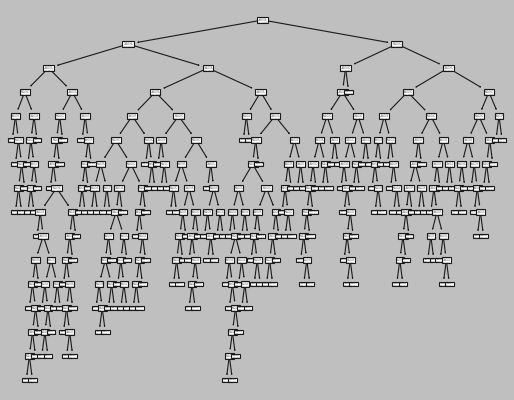

In [191]:
tree.plot_tree(arbol)

In [192]:
pred = arbol.predict(X_test)

In [193]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 46  56]
 [ 72 195]]
              precision    recall  f1-score   support

     Ausente       0.39      0.45      0.42       102
    Presente       0.78      0.73      0.75       267

    accuracy                           0.65       369
   macro avg       0.58      0.59      0.59       369
weighted avg       0.67      0.65      0.66       369



In [194]:
arbol.score(X_test,y_test)

0.6531165311653117

In [195]:
arbol.score(X_train,y_train)

1.0

In [199]:
# se amplía el modelo antes encontrado para poder ser observado en detalle
X_nombre = list(X.columns)

In [211]:
classes= ["Ausente","Presente"]

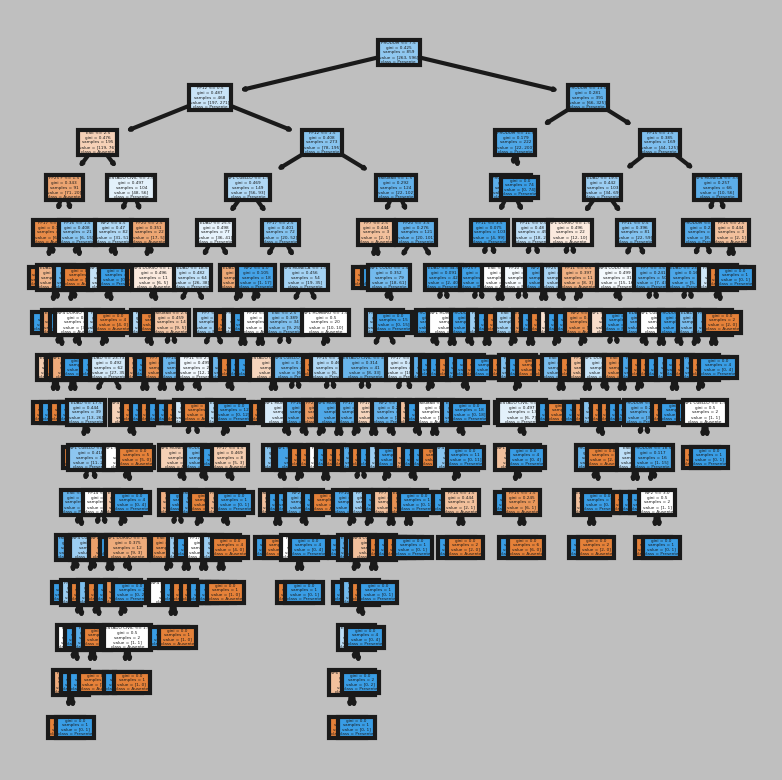

In [212]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3,3),dpi=300)
tree.plot_tree(arbol,
              feature_names = X_nombre,
              class_names = classes,
              filled = True);
fig.savefig("imagename.png")

# validación Cruzada Arbol de decisión

In [217]:
kf = KFold(n_splits=700)
 
ad = DecisionTreeClassifier()
 
ad.fit(X_train, y_train)
 
score = ad.score(X_train,y_train)
 
print("Metrica del modelo", score)
 
scores = cross_val_score(ad, X_train, y_train, cv=kf, scoring="accuracy")
 
print("Metricas cross_validation", scores)
 
print("Media de cross_validation", scores.mean())
 
preds = ad.predict(X_test)
 
score_pred = metrics.accuracy_score(y_test, preds)
 
print("Metrica en Test", score_pred)

Metrica del modelo 1.0
Metricas cross_validation [1.  0.5 1.  0.5 1.  0.5 0.5 0.5 1.  1.  1.  1.  1.  1.  0.5 0.5 0.  0.5
 1.  0.5 0.5 0.  0.  0.  1.  0.5 1.  0.5 0.5 1.  0.5 0.5 1.  0.5 1.  1.
 0.5 1.  1.  1.  1.  0.5 1.  0.5 0.5 0.5 0.5 1.  0.5 1.  1.  1.  0.5 0.
 0.5 1.  1.  0.  1.  1.  0.5 0.  0.5 0.  1.  0.5 1.  1.  0.5 1.  0.5 0.5
 1.  0.5 1.  0.5 0.5 0.5 0.  1.  1.  0.5 0.5 1.  0.5 0.  0.5 0.5 0.5 1.
 1.  1.  0.5 0.5 1.  1.  1.  0.5 1.  1.  1.  1.  0.5 1.  1.  1.  0.5 0.5
 1.  0.5 0.5 1.  0.5 1.  1.  0.5 1.  1.  1.  1.  1.  0.5 0.5 1.  0.5 0.5
 0.5 1.  0.5 1.  0.5 1.  1.  1.  1.  0.  0.5 0.5 1.  0.5 0.5 1.  0.5 0.5
 1.  0.5 0.  1.  0.5 0.5 1.  0.5 0.5 0.5 1.  1.  1.  1.  1.  1.  0.  1.
 0.  0.  1.  0.  1.  1.  1.  0.  0.  0.  1.  1.  1.  1.  1.  1.  0.  1.
 1.  1.  1.  0.  0.  0.  0.  1.  0.  1.  1.  0.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  0.  0.  1.  0.  0.  1.  1.
 1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.
 1.  0.  1

##### sin la variable edad en la base (bdp) para el arbol, se observan mejores resultados

# BOSQUE ALEATORIO

In [221]:
modelo2=rfc.fit(X_train,y_train)
modelo2

RandomForestClassifier(n_estimators=20, random_state=33)

In [222]:
rfc_pred = rfc.predict(X_test)

In [223]:
print(confusion_matrix(y_test,rfc_pred)) 
print(classification_report(y_test,rfc_pred))

[[ 38  64]
 [ 26 241]]
              precision    recall  f1-score   support

     Ausente       0.59      0.37      0.46       102
    Presente       0.79      0.90      0.84       267

    accuracy                           0.76       369
   macro avg       0.69      0.64      0.65       369
weighted avg       0.74      0.76      0.74       369



In [224]:
rfc.score(X_test,y_test)

0.7560975609756098

In [225]:
rfc.score(X_train,y_train)

0.9965075669383003

## VALIDACIÓN Bosque aleatorio

In [242]:
from sklearn  import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

In [243]:
kf = KFold(n_splits=700)
 
ba = RandomForestClassifier(n_estimators = 20,random_state = 33)
 
ba.fit(X_train, y_train)
 
score = ba.score(X_train,y_train)
 
print("Metrica del modelo", score)
 
scores = cross_val_score(ba, X_train, y_train, cv=kf, scoring="accuracy")
 
print("Metricas cross_validation", scores)
 
print("Media de cross_validation", scores.mean())
 
preds = ba.predict(X_test)
 
score_pred = metrics.accuracy_score(y_test, preds)
 
print("Metrica en Test", score_pred)

Metrica del modelo 0.9965075669383003
Metricas cross_validation [1.  1.  1.  1.  0.5 0.5 0.5 1.  1.  1.  1.  1.  1.  0.5 1.  1.  0.  0.5
 1.  0.5 1.  0.5 0.  0.  1.  1.  1.  0.5 1.  1.  1.  0.5 1.  1.  1.  1.
 0.5 0.5 1.  0.  1.  0.5 1.  0.  1.  1.  0.5 0.5 0.5 0.5 0.5 1.  0.  0.5
 1.  1.  1.  0.5 1.  1.  1.  0.5 0.5 1.  1.  1.  0.5 1.  0.5 1.  0.5 1.
 0.5 1.  1.  0.5 1.  0.5 0.5 1.  1.  1.  0.5 1.  0.5 0.  1.  1.  0.5 1.
 0.5 1.  0.5 0.5 1.  1.  0.5 0.5 0.5 0.5 1.  1.  1.  1.  1.  0.5 1.  1.
 1.  0.5 0.5 1.  1.  1.  0.5 1.  0.5 1.  1.  1.  1.  0.5 0.5 1.  0.5 1.
 0.5 1.  0.5 1.  1.  0.5 1.  0.5 1.  0.  0.5 0.5 1.  0.  0.5 0.5 0.  0.5
 1.  1.  1.  1.  0.5 1.  1.  0.5 0.5 1.  0.5 1.  1.  0.5 1.  1.  1.  1.
 1.  0.  1.  0.  1.  1.  0.  1.  1.  0.  1.  1.  0.  1.  1.  0.  0.  1.
 1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.
 1.  0.  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  0.  1.  0.  1.  1.
 1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  

##### sin la variable edad en la base (bdp) para el bosque, se observan mejores resultados

# Ensayo regresión logit (coeficientes)

In [244]:
bdp1.columns

Index(['PRODUM', 'facultad', 'EDAD', 'ESTADO CIVIL', 'ESE', 'NP1 CUELLO',
       'NP1 HOMBRO', 'NP1 DORSO', 'NP1 CODO', 'NP1 MUÑECA', 'NP2',
       'NP4 CUELLO', 'NP4 HOMBRO', 'NP4 DORSO', 'NP4 CODO', 'NP4 MUÑECA',
       'NP6 MUÑECA', 'FP7', 'FP10', 'FP11', 'FP12', 'FP14', 'FP15', 'FP16',
       'FP17', 'FP20', 'FP25 C', 'FP25 F', 'FP25 H', 'Dependencia'],
      dtype='object')

In [245]:
bdp1.facultad.value_counts().sort_index()

1    333
2    300
3    300
4    295
Name: facultad, dtype: int64

In [246]:
modelo = LogisticRegression(penalty='none')
modelo.fit(I_train,D_train)

NameError: name 'I_train' is not defined

In [ ]:
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Accuracy de entrenamiento:", modelo.score(I_train,D_train))


# REGRESIÓN LOGÍSTICA

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [249]:
I = bdp1.drop('Dependencia', axis = 1)

D = bdp1['Dependencia']

In [250]:
I_train, I_test, D_train, D_test = train_test_split(I, D, test_size=0.30, random_state=33)

In [ ]:
bdp1

In [ ]:
bdp1.columns

In [251]:
clf = LogisticRegression()
modelo3=clf.fit(I_train, D_train)
modelo3

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [252]:
y_pred = clf.predict_proba(I_test)
y_pred

array([[0.18968368, 0.81031632],
       [0.28701915, 0.71298085],
       [0.38861263, 0.61138737],
       [0.05004758, 0.94995242],
       [0.73159821, 0.26840179],
       [0.42886371, 0.57113629],
       [0.37515059, 0.62484941],
       [0.0456742 , 0.9543258 ],
       [0.40521527, 0.59478473],
       [0.25028135, 0.74971865],
       [0.47457032, 0.52542968],
       [0.24895394, 0.75104606],
       [0.7332656 , 0.2667344 ],
       [0.64059451, 0.35940549],
       [0.68754185, 0.31245815],
       [0.50783748, 0.49216252],
       [0.41696165, 0.58303835],
       [0.5996871 , 0.4003129 ],
       [0.49960887, 0.50039113],
       [0.08931059, 0.91068941],
       [0.12397123, 0.87602877],
       [0.06568794, 0.93431206],
       [0.34665614, 0.65334386],
       [0.36689741, 0.63310259],
       [0.06853104, 0.93146896],
       [0.08275586, 0.91724414],
       [0.33910215, 0.66089785],
       [0.37894062, 0.62105938],
       [0.43923988, 0.56076012],
       [0.39185904, 0.60814096],
       [0.

In [253]:
y_pred = clf.predict(I_test)
y_pred

array(['Presente', 'Presente', 'Presente', 'Presente', 'Ausente',
       'Presente', 'Presente', 'Presente', 'Presente', 'Presente',
       'Presente', 'Presente', 'Ausente', 'Ausente', 'Ausente', 'Ausente',
       'Presente', 'Ausente', 'Presente', 'Presente', 'Presente',
       'Presente', 'Presente', 'Presente', 'Presente', 'Presente',
       'Presente', 'Presente', 'Presente', 'Presente', 'Presente',
       'Presente', 'Presente', 'Presente', 'Ausente', 'Presente',
       'Presente', 'Presente', 'Presente', 'Presente', 'Presente',
       'Presente', 'Presente', 'Presente', 'Presente', 'Presente',
       'Presente', 'Presente', 'Presente', 'Presente', 'Ausente',
       'Ausente', 'Ausente', 'Ausente', 'Presente', 'Presente', 'Ausente',
       'Ausente', 'Presente', 'Presente', 'Presente', 'Presente',
       'Presente', 'Ausente', 'Presente', 'Ausente', 'Presente',
       'Presente', 'Ausente', 'Presente', 'Ausente', 'Presente',
       'Presente', 'Presente', 'Presente', 'Presente', 

In [254]:
print(confusion_matrix(D_test,y_pred))
print(classification_report(D_test,y_pred))

[[ 41  61]
 [ 23 244]]
              precision    recall  f1-score   support

     Ausente       0.64      0.40      0.49       102
    Presente       0.80      0.91      0.85       267

    accuracy                           0.77       369
   macro avg       0.72      0.66      0.67       369
weighted avg       0.76      0.77      0.75       369



In [255]:
clf.score(I_test,D_test)

0.7723577235772358

In [256]:
clf.score(I_train,D_train)

0.7683352735739232

In [ ]:
bdp.columns

# validación regresión logist

In [257]:
from sklearn  import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

In [258]:
kf = KFold(n_splits=700)
 
clf = LogisticRegression()
 
clf.fit(I_train, D_train)
 
score = clf.score(I_train,D_train)
 
print("Metrica del modelo", score)
 
scores = cross_val_score(clf, I_train, D_train, cv=kf, scoring="accuracy")
 
print("Metricas cross_validation", scores)
 
print("Media de cross_validation", scores.mean())
 
preds = clf.predict(I_test)
 
score_pred = metrics.accuracy_score(y_test, preds)
 
print("Metrica en Test", score_pred)

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Metrica del modelo 0.7683352735739232


C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Metricas cross_validation [1.  1.  1.  1.  0.5 0.5 1.  1.  1.  1.  0.5 1.  1.  0.5 1.  1.  0.  1.
 1.  0.5 1.  0.5 0.  0.  1.  0.5 1.  0.5 1.  1.  1.  0.5 1.  0.5 1.  1.
 1.  0.5 1.  1.  1.  1.  1.  0.5 1.  1.  1.  1.  0.5 0.5 1.  1.  0.  0.
 1.  1.  1.  0.5 1.  1.  1.  1.  0.5 1.  0.5 1.  0.5 1.  0.  0.5 1.  0.5
 0.5 1.  0.5 1.  1.  0.5 0.5 1.  1.  0.  1.  1.  1.  0.5 1.  1.  0.5 1.
 0.5 1.  0.5 0.5 0.5 0.  0.5 0.5 0.5 0.  0.5 1.  1.  1.  1.  0.5 1.  1.
 1.  0.  0.5 1.  1.  1.  1.  1.  0.5 0.5 1.  1.  1.  0.5 0.5 1.  0.  1.
 1.  1.  1.  1.  1.  0.5 1.  1.  1.  0.  0.5 0.5 1.  0.5 0.5 0.  0.  0.5
 1.  1.  1.  1.  1.  1.  0.5 0.5 0.5 1.  1.  1.  1.  0.5 1.  0.  0.  1.
 1.  0.  1.  0.  1.  1.  0.  0.  1.  0.  1.  1.  0.  1.  0.  0.  0.  1.
 1.  1.  0.  1.  1.  0.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  0.
 1.  0.  1.  1.  1.  0.  1.  0.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.
 1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1. 

# SVM

In [259]:
ind = bdp1.drop('Dependencia', axis = 1)

dep = bdp1['Dependencia']

In [260]:
X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size=0.30, random_state=33)

In [262]:
algoritmo.fit(X_train,y_train)

SVC(C=10.0)

In [263]:
y_pred=algoritmo.predict(X_test)

In [264]:
confusion_matrix(y_test,y_pred)

array([[ 43,  59],
       [ 24, 243]], dtype=int64)

In [265]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Ausente       0.64      0.42      0.51       102
    Presente       0.80      0.91      0.85       267

    accuracy                           0.78       369
   macro avg       0.72      0.67      0.68       369
weighted avg       0.76      0.78      0.76       369



In [ ]:
bdp1

In [266]:
bdp_E=bdp[['PRODUM','facultad',"edadm",'ESTADO CIVIL','ESE','NP1 CUELLO', 'NP1 HOMBRO', 'NP1 DORSO', 'NP1 CODO', 'NP1 MUÑECA',
       'NP2', 'NP4 CUELLO', 'NP4 HOMBRO', 'NP4 DORSO', 'NP4 CODO','NP4 MUÑECA','NP6 MUÑECA','FP7', 'FP10', 'FP11', 'FP12',
       'FP14', 'FP15', 'FP16', 'FP17', 'FP20', 'FP25 C','FP25 F', 'FP25 H','Dependencia']]

# validación cruzada svm

In [267]:

kf = KFold(n_splits=700)
 

algoritmo= SVC(kernel="rbf",C=10.0) 

algoritmo.fit(X_train,y_train) 
    
score = algoritmo.score(X_train,y_train)
 
print("Metrica del modelo", score)
 
scores = cross_val_score(algoritmo, X_train, y_train, cv=kf, scoring="accuracy")
 
print("Metricas cross_validation", scores)
 
print("Media de cross_validation", scores.mean())
 
preds = algoritmo.predict(X_test)
 
score_pred = metrics.accuracy_score(y_test, preds)
 
print("Metrica en Test", score_pred)

Metrica del modelo 0.7904540162980209
Metricas cross_validation [1.  1.  1.  1.  0.5 0.5 1.  1.  1.  0.5 1.  1.  1.  0.5 1.  1.  0.  1.
 1.  0.5 1.  0.5 0.  0.  1.  1.  1.  0.5 1.  1.  1.  0.5 1.  0.5 0.5 1.
 0.5 0.5 1.  0.  1.  1.  1.  0.5 1.  1.  1.  1.  0.5 0.5 1.  1.  0.  0.
 1.  1.  1.  0.5 1.  1.  1.  1.  0.5 1.  0.5 1.  0.5 1.  0.  0.5 1.  0.5
 0.5 1.  1.  1.  1.  0.5 0.5 1.  1.  1.  1.  1.  1.  0.5 1.  1.  0.5 1.
 0.5 1.  0.5 0.5 1.  0.5 0.5 0.5 0.5 0.  0.5 1.  1.  1.  1.  0.5 1.  1.
 1.  0.  0.5 1.  1.  1.  1.  1.  0.5 0.5 1.  1.  1.  0.5 0.5 1.  0.  1.
 1.  1.  0.5 1.  1.  0.5 1.  1.  1.  0.  0.5 0.5 1.  0.  0.5 0.  0.  0.5
 1.  1.  1.  0.5 1.  1.  1.  0.5 0.5 1.  0.5 1.  1.  0.5 1.  1.  0.  1.
 1.  0.  1.  0.  1.  1.  0.  0.  1.  0.  1.  1.  0.  1.  1.  0.  0.  1.
 1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.
 1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  0.  1.  1.
 1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1

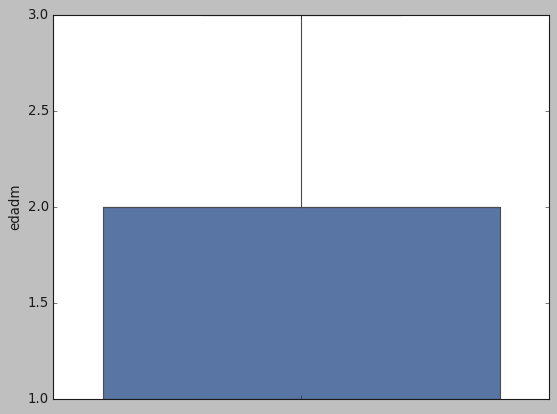

In [268]:
sns.boxplot(data=bdp_E,y= 'edadm')


In [269]:
bdp_E["edadm"].describe()

count    1228.000000
mean        1.868893
std         0.759558
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: edadm, dtype: float64

## SVM con edadm

In [270]:
xnueva = bdp_E.drop('Dependencia', axis = 1)

ynueva = bdp_E['Dependencia']

In [271]:
X_train, X_test, y_train, y_test = train_test_split(xnueva, ynueva, test_size=0.30, random_state=33)

In [272]:
from sklearn.svm import SVC
algoritmo= SVC(kernel="rbf",C=10.0)

In [273]:
algoritmo.fit(X_train,y_train)

SVC(C=10.0)

In [274]:
y_predn=algoritmo.predict(X_test)

In [275]:
confusion_matrix(y_test,y_predn)

array([[ 45,  57],
       [ 25, 242]], dtype=int64)

In [276]:
print(classification_report(y_test,y_predn))

              precision    recall  f1-score   support

     Ausente       0.64      0.44      0.52       102
    Presente       0.81      0.91      0.86       267

    accuracy                           0.78       369
   macro avg       0.73      0.67      0.69       369
weighted avg       0.76      0.78      0.76       369



In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
y =[0.071,0.132,0.291,0.515,0.591,0.633,0.670,0.702,0.741,0.763 ]
dy=[0.00045473,0.0004115,0.00047422,0.00051651,0.00044234,0.00041419,0.00025298,0.00062539,0.00053583,0.00029515]

x=[5, 10, 20 ,50, 80, 90, 100, 114, 120,135]
plt.figure(figsize=(15,10))
plt.errorbar(x,y,xerr=dy,fmt=":.")
plt.xlabel('Peso')
plt.ylabel('Voltaje')